### **Imported Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(color_codes=True)

### **Data Loading**

**About Dataset**

For instance, we will be dealing with 2 datasets (tables): contract and financing.


*Contract Table:*
Contains information about factoring contracts, including status, type, dates, financial details, and other contract-related data.

*Financing Table:*
Includes data related to financing activities for each factoring contract, such as financing amount, dates, and the financing instrument used.

**Related Attributes**

*Contract Table:*

- [STATUT_CTR] Statut du contrat : Le statut du contrat fait référence à l'état actuel du contrat d'affacturage, par exemple, actif, en cours,  résilié, etc.
- [REF_CTR_PAPIER_CTR] Référence Papier du contrat : Il s'agit du numéro ou de l'identifiant attribué au contrat d'affacturage dans sa version papier ou physique. Cela permet d'identifier et de retrouver spécifiquement ce contrat.
- [TYP_CTR] Type du contrat : Le type du contrat indique la catégorie ou la nature du contrat
d'affacturage, par exemple, contrat d'affacturage sans recours, contrat d'affacturage avec
recours, etc.
- [DAT_SIGN_CTR] Date signature : Il s'agit de la date à laquelle le contrat d'affacturage a été signé par les parties concernées
- [DAT_DEB_CTR] Date début : Cela indique la date de début d'application ou d'effet du
contrat d'affacturage
- [DAT_RESIL_CTR] Date Résiliation : Il s'agit de la date à laquelle le contrat d'affacturage a été résilié ou a pris fin
- [DAT_PROCH_VERS_CTR] Date d'anniversaire : La date d'anniversaire fait référence à la date spécifique chaque année à laquelle le contrat d'affacturage est renouvelé ou réexaminé.
- [CA_CTR] Chiffre d'affaires : Le chiffre d'affaires représente le montant total des ventes
réalisées par l'entreprise bénéficiaire couvert par le contrat d'affacturage
- [CA_EXP_CTR] Chiffre d'affaires Export : C'est le montant total des ventes à l'exportation
réalisées par l'entreprise bénéficiaire et inclus dans le contrat d'affacturage.
- [CA_IMP_CTR] Chiffre d'affaires Import : C'est le montant total des ventes à l'importation
réalisées par l'entreprise bénéficiaire et inclus dans le contrat d'affacturage.
- [LIM_FIN_CTR] Limite Financement : Il s'agit du montant maximum que la société de
factoring est prête à financer dans le cadre du contrat d'affacturage. C'est la limite au delà de laquelle l'entreprise ne peut pas obtenir de financement supplémentaire.
- [DEVISE_CTR] Devise du contrat : Cela indique la devise dans laquelle le contrat
d'affacturage est exprimé, par exemple, dollars américains, euros, etc
- [NB_ACH_PREVU_CTR] Nombre d'Acheteurs dans le contrat : C'est le nombre total d'acheteurs ou de clients inclus dans le contrat d'affacturage. Il peut y avoir plusieurs acheteurs couverts par un même contrat.
- [NB_FACT_PREVU_CTR] Nombre de factures dans le contrat : Il s'agit du nombre total de
factures émises par l'entreprise bénéficiaire et incluses dans le contrat d'affacturage.
- [NB_AVOIRS_PREVU_CTR] Nombre d'avoir dans le contrat : C'est le nombre total d'avoir
émis par l'entreprise bénéficiaire et inclus dans le contrat d'affacturage.
- [NB_REMISES_PREVU_CTR] Nombre de remises dans le contrat : Il s'agit du nombre total
de remises accordées par l'entreprise bénéficiaire et incluses dans le contrat d'affacturage.
- [DELAI_MOYEN_REG_CTR] Délai Moyen de règlement : Cela indique la durée moyenne
requise pour le règlement des factures dans le contrat d'affacturage. C'est le temps 
écoulé entre l'émission de la facture et le paiement effectif.
- [DELAI_MAX_REG_CTR] Délai Max du règlement : Il s'agit du délai maximal autorisé pour le règlement des factures dans le contrat d'affacturage. Au-delà de ce délai, des pénalités
ou des intérêts de retard peuvent s'appliquer.
- [MIN_COMM_FACT] Commission Minimum de factoring du contrat : C'est le montant
minimum de commission facturé par la société de factoring pour ses services dans le cadre du contrat. Il représente le coût de base de l'affacturage, indépendamment du montant 
total des factures

*Financing Table:*

- [REF_CTR_FIN] Référence du contrat Il s'agit d'un identifiant unique ou d'un numéro de référence attribué à un contrat spécifique.
- [REF_ADH_FIN] Référence individu dont le rôle ADH du contrat: Cette référence fait généralement référence à une personne spécifique qui est impliquée dans le contrat en tant qu'adhérent (ou adhérente). Le rôle de cette personne peut varier selon le type de contrat, par exemple, elle peut être le titulaire principal, le cotitulaire ou le bénéficiaire du contrat.
- [MONT_FIN] Montant Financement Il s'agit du montant total de financement demandé ou accordé dans le cadre du contrat.
- [DAT_FIN] Date Financement Il s'agit de la date à laquelle le financement est accordé ou prévue d'être accordé.
- [INSTR_FIN] Instrument de Financement Il fait référence à l'instrument financier ou à la 
méthode utilisée pour fournir le financement. Cela peut inclure des instruments tels que les 
prêts, les lignes de crédit, les subventions, les obligations ou d'autres formes de financement.
- [REF_INSTR_FIN] Référence de l'instrument C'est l'identifiant ou le numéro de référence 
spécifique associé à l'instrument de financement utilisé.
- [DAT_INSTR_FIN] Date de l'instrument C'est la date à laquelle l'instrument de financement est émis ou signé. Il s'agit de la date officielle de création ou d'entrée en vigueur de l'instrument financier utilisé pour fournir le financement.
- [ETAT_FIN] État du financement Cela fait référence à l'état actuel du financement, indiquant s'il est approuvé, en cours de traitement, accordé, refusé ou tout autre statut pertinent. Cela permet de suivre l'avancement du processus de financement et de connaître la situation actuelle du contrat


In [2]:
# Loading data into dataframe
ctr_data = pd.read_csv('T_CONTRAT.csv', parse_dates=['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR'])
fin_data = pd.read_csv('T_FINANCEMENT.csv', parse_dates=['DAT_FIN'])
his_data = pd.read_csv('T_HISTORIQUE.csv', parse_dates=['DATE_ACTION'])
enc_data = pd.read_csv('T_ENCAISSEMENT.csv', parse_dates=['DAT_RECEP_ENC', 'DAT_VAL_ENC'])

In [3]:
# Displaying first 5 rows
ctr_data.head()

,REF_CTR,STATUT_CTR,REF_CTR_PAPIER_CTR,SERVICE_CTR,TYP_CTR,DAT_SIGN_CTR,DAT_DEB_CTR,DAT_RESIL_CTR,DAT_PROCH_VERS_CTR,CA_CTR,...,DEVISE_CTR,NB_ACH_PREVU_CTR,NB_FACT_PREVU_CTR,NB_AVOIRS_PREVU_CTR,NB_REMISES_PREVU_CTR,DELAI_MOYEN_REG_CTR,DELAI_MAX_REG_CTR,FACT_REG_CTR,DERN_MONT_DISP_2,MIN_COMM_FACT
0,8,V,001/2014,NaN,0,2014-04-01,2014-04-01,NaT,NaT,0.000,...,TND,0,0,0,0,0,0.0,True,0.0,NaN
1,9,A,001/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,4000000.000,...,TND,90,90,0,90,120,120.0,True,0.0,NaN
2,10,V,002/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,5000000.000,...,TND,10,90,0,90,90,120.0,True,0.0,NaN
3,11,V,004/2014,NaN,0,2014-01-27,2014-01-27,2014-02-12,2014-02-12,1500000.000,...,TND,50,80,0,0,120,120.0,True,0.0,NaN
4,18,V,003/2013,NaN,0,2014-02-12,2014-02-12,2014-02-12,2014-02-12,256648.412,...,TND,10,30,0,0,90,90.0,True,0.0,NaN


In [4]:
# Displaying first 5 rows
fin_data.head()


,ID_FIN,REF_CTR_FIN,REF_ADH_FIN,MONT_FIN,DAT_FIN,INSTR_FIN,REF_INSTR_FIN,DAT_INSTR_FIN,ETAT_FIN,ID_DISPO_FIN,TYPE_ENC
0,1,9,NaN,4091792.969,2014-01-31,NaN,0.0,NaN,1.0,NaN,NaN
1,2,11,NaN,94055.000,NaT,NaN,0.0,NaN,1.0,NaN,NaN
2,3,18,NaN,256648.412,2014-02-27,NaN,0.0,NaN,1.0,NaN,NaN
3,4,19,NaN,135566.736,NaT,NaN,0.0,NaN,1.0,NaN,NaN
4,5,20,NaN,45064.723,NaT,NaN,0.0,NaN,1.0,NaN,NaN


In [5]:
fin_data.shape

(3287, 11)

In [6]:
fin_data.isna().sum()

ID_FIN              0
REF_CTR_FIN         0
REF_ADH_FIN       417
MONT_FIN            0
DAT_FIN             6
INSTR_FIN          76
REF_INSTR_FIN     264
DAT_INSTR_FIN      76
ETAT_FIN         2677
ID_DISPO_FIN     3287
TYPE_ENC         2646
dtype: int64

In [7]:
his_data.head()

,ID_HISTORIQUE,DATE_ACTION,ACTION,T_TABLE,ID_ENREGISTREMENT,LOGIN_USER,IP_PC,NOM_PC,REF_CTR_HIST,REF_IND_HIST,ABREV_ROLE_HIST,ID_HISTORIQUEE
0,0,2019-11-01,Ajout,TR_TMM,198,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,3
1,0,2019-11-22,Modification,T_DET_BORD,31004,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN,4
2,0,2019-11-22,Modification,TJ_DOCUMENT_DET_BORD,10955,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN,5
3,0,2019-11-22,Modification,T_DET_BORD,31005,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN,6
4,0,2019-11-22,Modification,TJ_DOCUMENT_DET_BORD,10956,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN,7


In [8]:
enc_data.head()

,ID_ENC,REF_CTR_ENC,REF_ADH_ENC,REF_ACH_ENC,MONT_ENC,DEVISE_ENC,DAT_RECEP_ENC,DAT_VAL_ENC,TYP_ENC,VALIDE_ENC,REF_ENC,RIB_ENC,BORD_ENC,REF_SEQ_ENC,PREAVIS
0,10,10,8.0,28.0,NaN,NaN,NaT,NaN,T,True,29638,01800031111051863384,NaN,NaN,NaN
1,11,10,8.0,28.0,40000.0,NaN,NaT,NaN,C,True,40405,01800031111051863384,NaN,NaN,NaN
2,12,10,8.0,28.0,27000.0,NaN,NaT,NaN,T,True,29735,01800031111051863384,NaN,NaN,NaN
3,13,10,8.0,28.0,40000.0,NaN,NaT,NaN,T,True,40502,01800031111051863384,NaN,NaN,NaN
4,14,10,8.0,28.0,28435.4,NaN,NaT,NaN,T,True,2714,01800031111051863384,NaN,NaN,NaN


#### **EDA - Exploratory Data Analysis**

##### **Combined Tables**

In [9]:
# Perform the left join
merged_data = pd.merge(ctr_data, fin_data, how='left', left_on='REF_CTR', right_on='REF_CTR_FIN')

# Drop the duplicate key column from financing_table
merged_data.drop(columns=['REF_CTR_FIN'], inplace=True)
merged_data.head()

,REF_CTR,STATUT_CTR,REF_CTR_PAPIER_CTR,SERVICE_CTR,TYP_CTR,DAT_SIGN_CTR,DAT_DEB_CTR,DAT_RESIL_CTR,DAT_PROCH_VERS_CTR,CA_CTR,...,ID_FIN,REF_ADH_FIN,MONT_FIN,DAT_FIN,INSTR_FIN,REF_INSTR_FIN,DAT_INSTR_FIN,ETAT_FIN,ID_DISPO_FIN,TYPE_ENC
0,8,V,001/2014,NaN,0,2014-04-01,2014-04-01,NaT,NaT,0.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,9,A,001/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,4000000.0,...,1.0,NaN,4091792.969,2014-01-31,NaN,0.0,NaN,1.0,NaN,NaN
2,9,A,001/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,4000000.0,...,11.0,NaN,439846.371,2014-03-04,NaN,0.0,NaN,1.0,NaN,NaN
3,10,V,002/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,5000000.0,...,10.0,NaN,434134.370,2014-03-04,NaN,0.0,NaN,1.0,NaN,NaN
4,10,V,002/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,5000000.0,...,12.0,NaN,2252585.300,2014-01-31,NaN,0.0,NaN,1.0,NaN,NaN


In [10]:
merged_data.shape

(3300, 33)

In [11]:
merged_data.isna().sum()

REF_CTR                    0
STATUT_CTR                 0
REF_CTR_PAPIER_CTR         7
SERVICE_CTR             3300
TYP_CTR                    0
DAT_SIGN_CTR               0
DAT_DEB_CTR                0
DAT_RESIL_CTR            119
DAT_PROCH_VERS_CTR         1
CA_CTR                     0
CA_EXP_CTR                 0
CA_IMP_CTR                 0
LIM_FIN_CTR                0
DEVISE_CTR                 0
NB_ACH_PREVU_CTR           0
NB_FACT_PREVU_CTR          0
NB_AVOIRS_PREVU_CTR        0
NB_REMISES_PREVU_CTR       0
DELAI_MOYEN_REG_CTR        0
DELAI_MAX_REG_CTR          1
FACT_REG_CTR              88
DERN_MONT_DISP_2          90
MIN_COMM_FACT           3212
ID_FIN                    13
REF_ADH_FIN              430
MONT_FIN                  13
DAT_FIN                   19
INSTR_FIN                 89
REF_INSTR_FIN            277
DAT_INSTR_FIN             89
ETAT_FIN                2690
ID_DISPO_FIN            3300
TYPE_ENC                2659
dtype: int64

##### **Contract Table**

In [12]:
# Checking contract dataset dimension (shape)
ctr_data.shape

(126, 23)

It appears we have **126** observations and **23** features (fields) in the dataset.

In [13]:
# Returning all the datatypes used in the dataset
ctr_data.dtypes

REF_CTR                          int64
STATUT_CTR                      object
REF_CTR_PAPIER_CTR              object
SERVICE_CTR                    float64
TYP_CTR                          int64
DAT_SIGN_CTR            datetime64[ns]
DAT_DEB_CTR             datetime64[ns]
DAT_RESIL_CTR           datetime64[ns]
DAT_PROCH_VERS_CTR      datetime64[ns]
CA_CTR                         float64
CA_EXP_CTR                     float64
CA_IMP_CTR                     float64
LIM_FIN_CTR                    float64
DEVISE_CTR                      object
NB_ACH_PREVU_CTR                 int64
NB_FACT_PREVU_CTR                int64
NB_AVOIRS_PREVU_CTR              int64
NB_REMISES_PREVU_CTR             int64
DELAI_MOYEN_REG_CTR              int64
DELAI_MAX_REG_CTR              float64
FACT_REG_CTR                    object
DERN_MONT_DISP_2               float64
MIN_COMM_FACT                  float64
dtype: object

The dataset, as it's mentioning, revolves around 4 types: 4 objects, 7 int64, 8 float64 and 4 datetime64[ns] (**15** numerical attributes and **8** categorical attributes)

In [14]:
# Getting more statistical details
ctr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_CTR,126.0,4.028571e+02,8.771540e+02,8.0,45.25,77.5,112.75,3.135000e+03
SERVICE_CTR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYP_CTR,126.0,2.063492e-01,4.439362e-01,0.0,0.00,0.0,0.00,2.000000e+00
CA_CTR,126.0,1.738617e+06,3.600415e+06,0.0,412500.00,775000.0,1500000.00,3.500000e+07
CA_EXP_CTR,126.0,1.587302e+04,1.781742e+05,0.0,0.00,0.0,0.00,2.000000e+06
CA_IMP_CTR,126.0,1.722744e+06,3.601231e+06,0.0,412500.00,675000.0,1500000.00,3.500000e+07
LIM_FIN_CTR,126.0,6.148836e+05,1.023292e+06,0.0,100000.00,300000.0,500000.00,7.500000e+06
NB_ACH_PREVU_CTR,126.0,1.823810e+01,2.873393e+01,0.0,5.00,10.0,15.00,2.000000e+02
NB_FACT_PREVU_CTR,126.0,8.738095e+01,1.678488e+02,0.0,20.00,50.0,100.00,1.500000e+03
NB_AVOIRS_PREVU_CTR,126.0,7.206349e+00,1.398474e+01,0.0,0.00,0.0,10.00,1.000000e+02


With the generated statistical measurements, we can gain insights into the central tendency, variability, and distribution of each attribute. For example, we can observe the average '**CA_CTR**' (chiffre d'affaires) is approximately 1.74 million, with a maximum of 35 million and a standard deviation of 3.60 million, indicating significant variability in the total sales covered by contracts. Similarly, '**LIM_FIN_CTR**' represents the maximum financing limit, and its mean is around 614,883, with a standard deviation of 1.02 million. However, it seems that some fields don't have a meaningful information like:
- **SERVICE_CTR**: This attribute seems to have missing values (NaN) for all records. As a result, it doesn't provide any meaningful information for analysis.
- **DERN_MONT_DISP_2**: This attribute seems to have missing values (NaN) for some records. It represents the last available amount for financing requests. 

In [15]:
# Checking missing values
ctr_data.isna().sum()

REF_CTR                   0
STATUT_CTR                0
REF_CTR_PAPIER_CTR        5
SERVICE_CTR             126
TYP_CTR                   0
DAT_SIGN_CTR              0
DAT_DEB_CTR               0
DAT_RESIL_CTR            23
DAT_PROCH_VERS_CTR        1
CA_CTR                    0
CA_EXP_CTR                0
CA_IMP_CTR                0
LIM_FIN_CTR               0
DEVISE_CTR                0
NB_ACH_PREVU_CTR          0
NB_FACT_PREVU_CTR         0
NB_AVOIRS_PREVU_CTR       0
NB_REMISES_PREVU_CTR      0
DELAI_MOYEN_REG_CTR       0
DELAI_MAX_REG_CTR         1
FACT_REG_CTR             22
DERN_MONT_DISP_2         24
MIN_COMM_FACT           104
dtype: int64

In the dataset, several fields have missing values including :
- REF_CTR_PAPIER_CTR        5
- SERVICE_CTR             126
- DAT_RESIL_CTR            23
- DAT_PROCH_VERS_CTR        1
- DELAI_MAX_REG_CTR         1
- FACT_REG_CTR             22
- DERN_MONT_DISP_2         24
- MIN_COMM_FACT           104

In [16]:
# Check the number of unique value from all of the object datatype
ctr_data.select_dtypes(include='object').nunique()

STATUT_CTR              3
REF_CTR_PAPIER_CTR    109
DEVISE_CTR              1
FACT_REG_CTR            1
dtype: int64

In [17]:
ctr_data.select_dtypes(include='object').sample(5)

,STATUT_CTR,REF_CTR_PAPIER_CTR,DEVISE_CTR,FACT_REG_CTR
97,V,0082019,TND,True
112,V,09/2020,TND,NaN
18,C,008/2014,TND,True
62,V,013/2017,TND,True
48,V,013/2016,TND,True


In [18]:
ctr_data['STATUT_CTR'].unique()

array(['V    ', 'A    ', 'C    '], dtype=object)

According to the result, there are 2 attributes containing only same value (**DEVISE_CTR**,	**FACT_REG_CTR**), 3 different status under **STATUS_CTR** and 109 for **REF_CTR_PAPIER_CTR**.

Obviously, we can end up dropping down REF_CTR_PAPIER_CTR, DEVISE_CTR and FACT_REG_CTR as they won't help to identifying patterns because of their meaningless existence.

In [19]:
ctr_data_cat_vars = list(ctr_data.select_dtypes(include='object').columns)
ctr_data_cat_vars.remove('REF_CTR_PAPIER_CTR')
ctr_data_cat_vars

['STATUT_CTR', 'DEVISE_CTR', 'FACT_REG_CTR']

<function matplotlib.pyplot.show(close=None, block=None)>

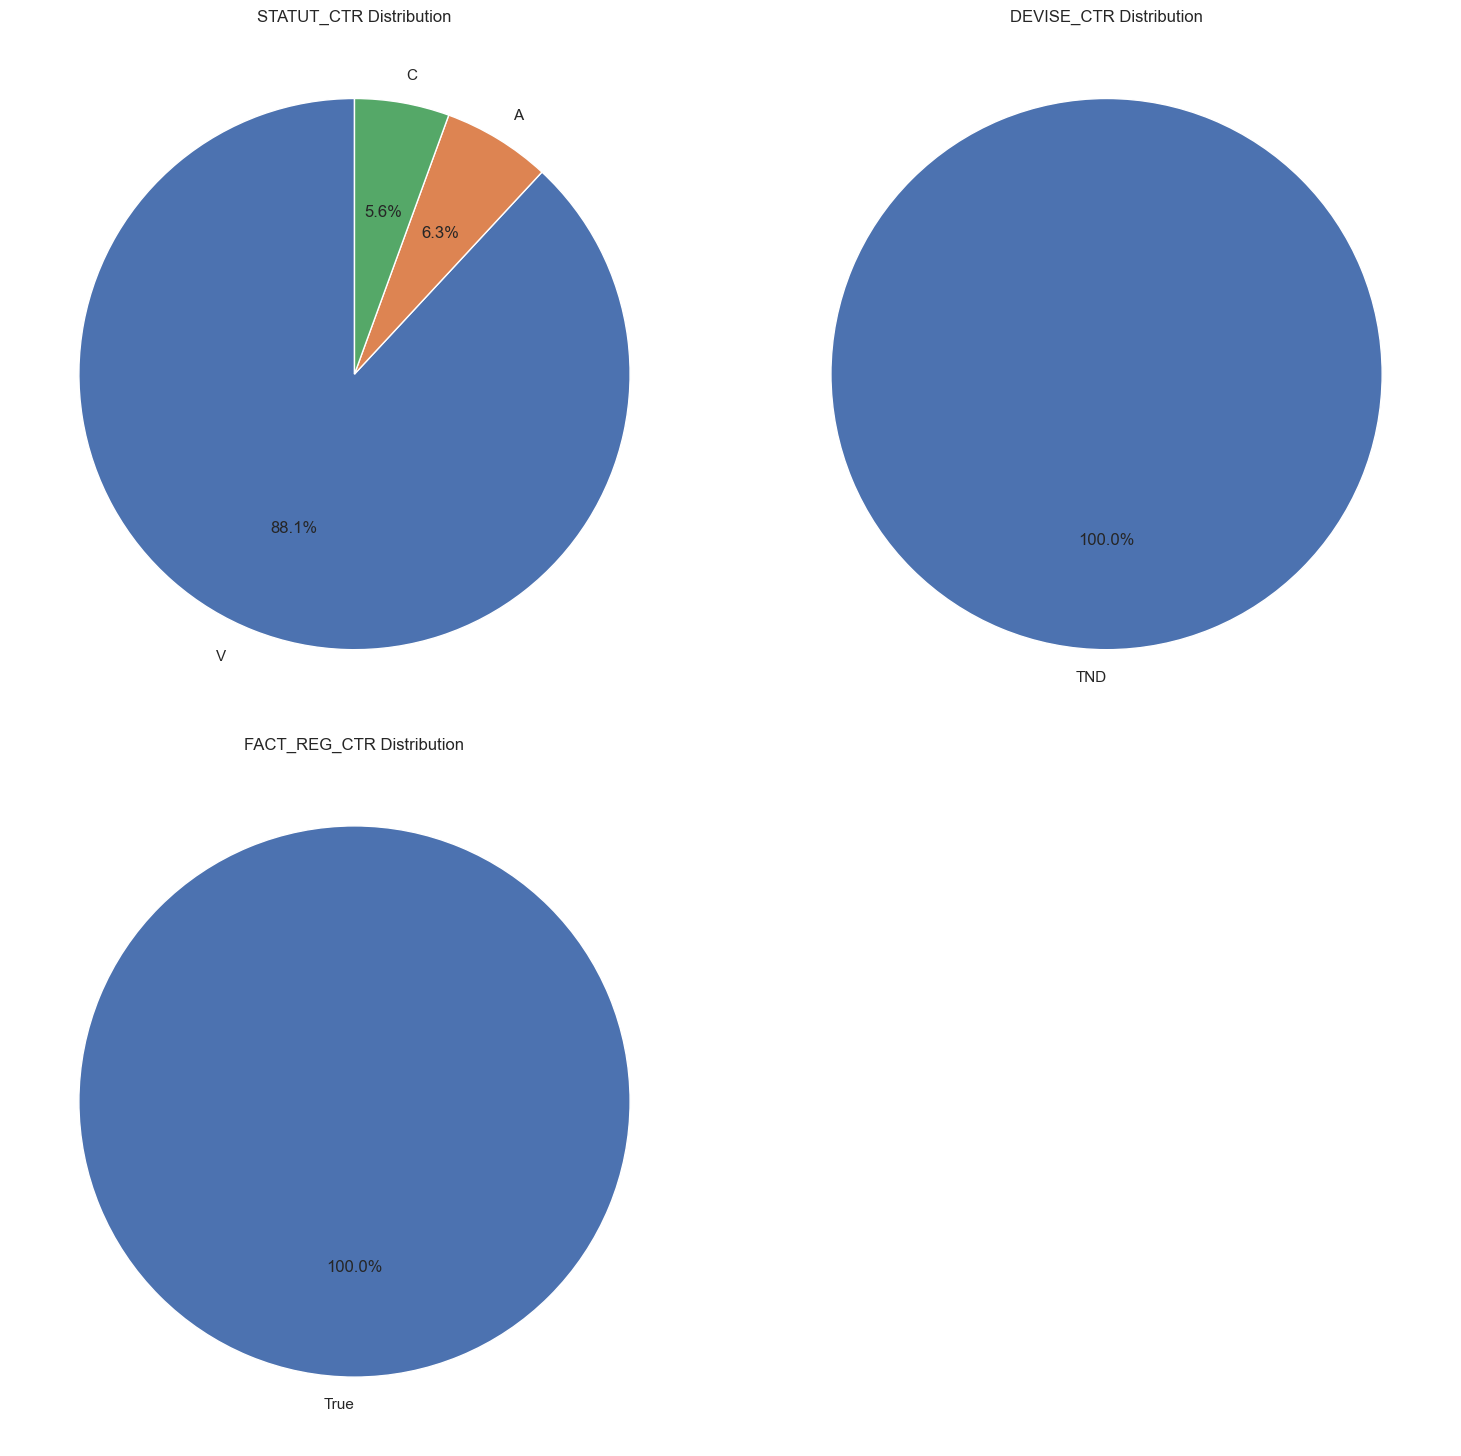

In [20]:
# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Create a pie chart for each categorical variables
for i, var in enumerate(ctr_data_cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_count = ctr_data[var].value_counts()

        axs.flat[i].pie(cat_count, labels=cat_count.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
fig.delaxes(axs[1][1])
plt.show

[(111, 'purple'), (8, 'blue'), (7, 'green')]


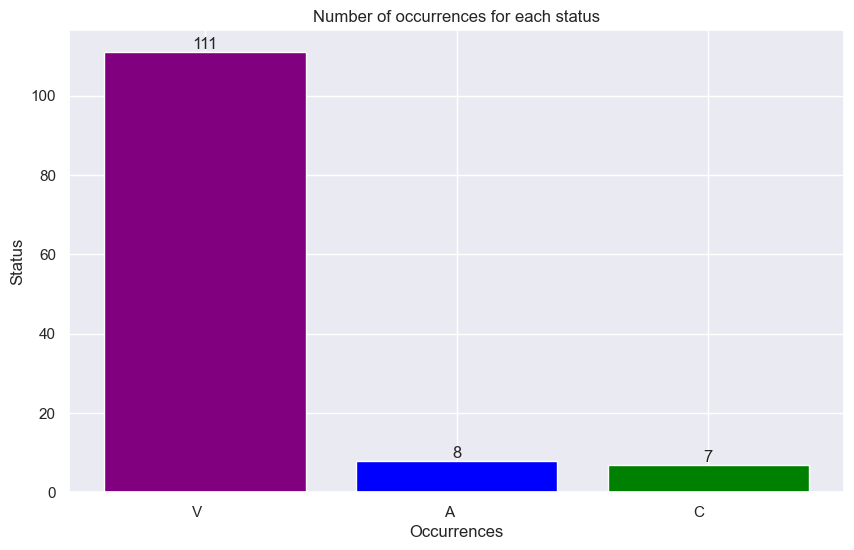

In [21]:
# Calculate the number of contracts for each status
colors = ['purple', 'blue', 'green']
status = []
for i, s in enumerate(ctr_data['STATUT_CTR'].unique()):
    status.append((len(ctr_data[ctr_data['STATUT_CTR'] == s]), colors[i]))
print(status)
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.xlabel('Occurrences')
plt.ylabel('Status')
plt.title('Number of occurrences for each status')
for i, s in enumerate(ctr_data['STATUT_CTR'].unique()):
    plt.bar(s, status[i][0], color=status[i][1])
    plt.text(s, status[i][0], str(status[i][0]), ha='center', va='bottom')
plt.show()

Now that we went through some explorations on the categorical variables, it may be reasonable to keep only **STATUS_CTR** as it shows high variability among others. The other categorical variables seem to be handful in extracting patterns and clear structure.

Before we move on to checking outliers, let's check whether the dates are valid or no.

In [22]:
date_vars = [d for d in ctr_data.columns if d.startswith('DAT')]
date_vars

['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR']

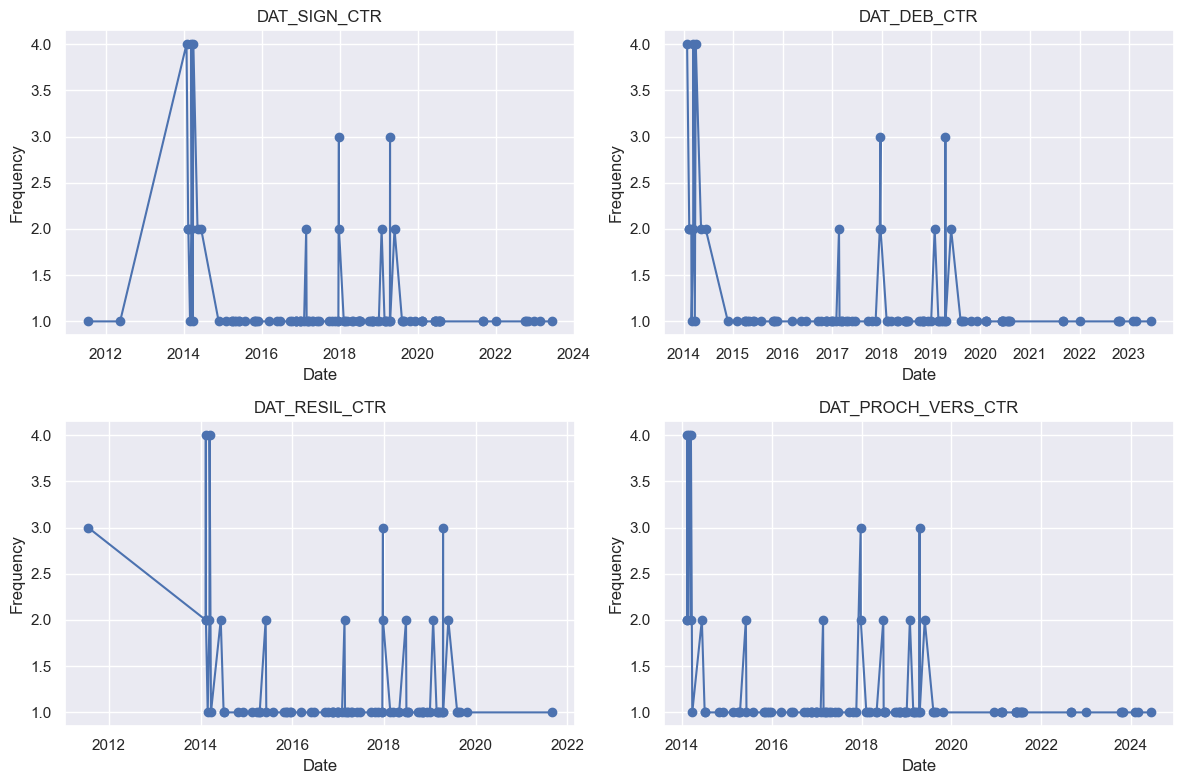

In [23]:
# Convert date fields to datetime data type
ctr_data[date_vars] = ctr_data[date_vars].apply(pd.to_datetime)

# Create a 2x2 subplot for the date fields
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each date field in a separate subplot
for i, date_column in enumerate(date_vars):
    row, col = i // 2, i % 2
    date_counts = ctr_data[date_column].value_counts().sort_index()
    axes[row, col].plot(date_counts.index, date_counts.values, marker='o')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(date_column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

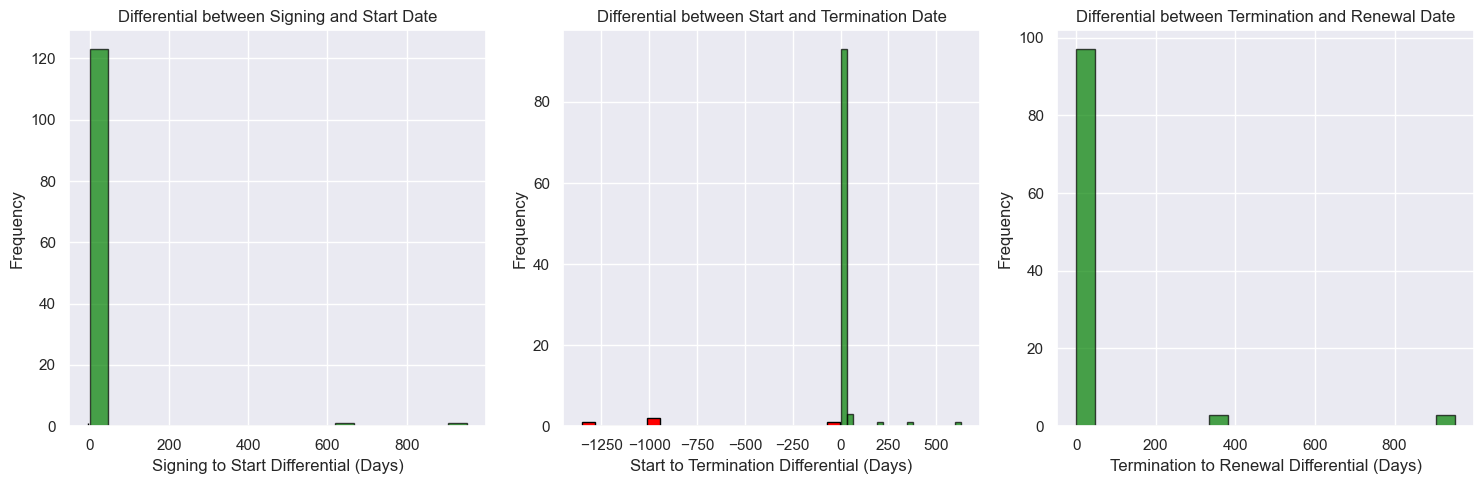

Number of negative differentials:
Sign_to_Start_Diff             1
Start_to_Termination_Diff      4
Termination_to_Renewal_Diff    0
dtype: int64


In [24]:
# Calculate the differentials
ctr_data['Sign_to_Start_Diff'] = (ctr_data['DAT_DEB_CTR'] - ctr_data['DAT_SIGN_CTR']).dt.days
ctr_data['Start_to_Termination_Diff'] = (ctr_data['DAT_RESIL_CTR'] - ctr_data['DAT_DEB_CTR']).dt.days
ctr_data['Termination_to_Renewal_Diff'] = (ctr_data['DAT_PROCH_VERS_CTR'] - ctr_data['DAT_RESIL_CTR']).dt.days

# Create the subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histograms for negative differentials
axes[0].hist(ctr_data[ctr_data['Sign_to_Start_Diff'] < 0]['Sign_to_Start_Diff'], bins=20, color='red', edgecolor='black')
axes[1].hist(ctr_data[ctr_data['Start_to_Termination_Diff'] < 0]['Start_to_Termination_Diff'], bins=20, color='red', edgecolor='black')
axes[2].hist(ctr_data[ctr_data['Termination_to_Renewal_Diff'] < 0]['Termination_to_Renewal_Diff'], bins=20, color='red', edgecolor='black')

# Plot the histograms for positive differentials
axes[0].hist(ctr_data[ctr_data['Sign_to_Start_Diff'] >= 0]['Sign_to_Start_Diff'], bins=20, color='green', edgecolor='black', alpha=0.7)
axes[1].hist(ctr_data[ctr_data['Start_to_Termination_Diff'] >= 0]['Start_to_Termination_Diff'], bins=20, color='green', edgecolor='black', alpha=0.7)
axes[2].hist(ctr_data[ctr_data['Termination_to_Renewal_Diff'] >= 0]['Termination_to_Renewal_Diff'], bins=20, color='green', edgecolor='black', alpha=0.7)

# Set labels and titles
axes[0].set_xlabel('Signing to Start Differential (Days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Differential between Signing and Start Date')

axes[1].set_xlabel('Start to Termination Differential (Days)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Differential between Start and Termination Date')

axes[2].set_xlabel('Termination to Renewal Differential (Days)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Differential between Termination and Renewal Date')

# Check for negative differentials
negative_diffs = (ctr_data[['Sign_to_Start_Diff', 'Start_to_Termination_Diff', 'Termination_to_Renewal_Diff']] < 0).sum()

plt.tight_layout()
plt.show()

print("Number of negative differentials:")
print(negative_diffs)

In [25]:
ctr_data[ctr_data['Sign_to_Start_Diff']<0][['DAT_SIGN_CTR',	'DAT_DEB_CTR']]

,DAT_SIGN_CTR,DAT_DEB_CTR
37,2015-11-28,2015-11-25


In [26]:
ctr_data[ctr_data['Start_to_Termination_Diff']<0][['DAT_DEB_CTR', 'DAT_RESIL_CTR']]

,DAT_DEB_CTR,DAT_RESIL_CTR
10,2014-02-27,2011-07-21
11,2014-03-01,2011-07-21
27,2015-04-01,2011-07-21
64,2017-12-19,2017-12-18


With these visuals, we can conclude the existence of some anomalies and outliers between dates in the dataset:

- The leftmost subplot shows the distribution of time differentials between the signing date and the start date of the contracts.
Most of the contracts have positive differentials, indicating that they were signed well in advance of their start dates. This suggests that there is typically a preparation period between signing and the actual start of contract implementation.
There are very few contracts with negative differentials, which may indicate data entry errors or unusual cases where contracts were signed after they were supposed to start.

- The middle subplot represents the distribution of time differentials between the start date and the termination date of the contracts. 
The majority of contracts have positive differentials, implying that they had a valid duration between the start and termination dates. This aligns with the expectation that contracts typically run for a specific period before termination.
There are very few contracts with negative differentials, which may indicate also data entry errors or unusual cases where contracts were terminated before they were supposed to start.

- The rightmost subplot shows the distribution of time differentials between the termination date and the renewal date of the contracts.
Most contracts have positive differentials, indicating that there is usually a gap between the termination of one contract and the renewal of a new contract. This is a common practice in contract management, allowing time for assessment and negotiation before renewing.
There are no contracts with negative differentials, which is reasonable as contracts cannot be renewed before they are terminated.

In [27]:
# Drop the new generated columns (differentials)
ctr_data.drop(['Sign_to_Start_Diff', 'Start_to_Termination_Diff',
       'Termination_to_Renewal_Diff'], inplace=True, axis=1)
# Select columns with numerical data types
numerical_columns = ctr_data.select_dtypes(include=['int64', 'float64']).columns[3:]
# I eliminated 3 columns ('REF_CTR', 'SERVICE_CTR', 'TYPE_CTR') because no need for them later
numerical_columns

Index(['CA_CTR', 'CA_EXP_CTR', 'CA_IMP_CTR', 'LIM_FIN_CTR', 'NB_ACH_PREVU_CTR',
       'NB_FACT_PREVU_CTR', 'NB_AVOIRS_PREVU_CTR', 'NB_REMISES_PREVU_CTR',
       'DELAI_MOYEN_REG_CTR', 'DELAI_MAX_REG_CTR', 'DERN_MONT_DISP_2',
       'MIN_COMM_FACT'],
      dtype='object')

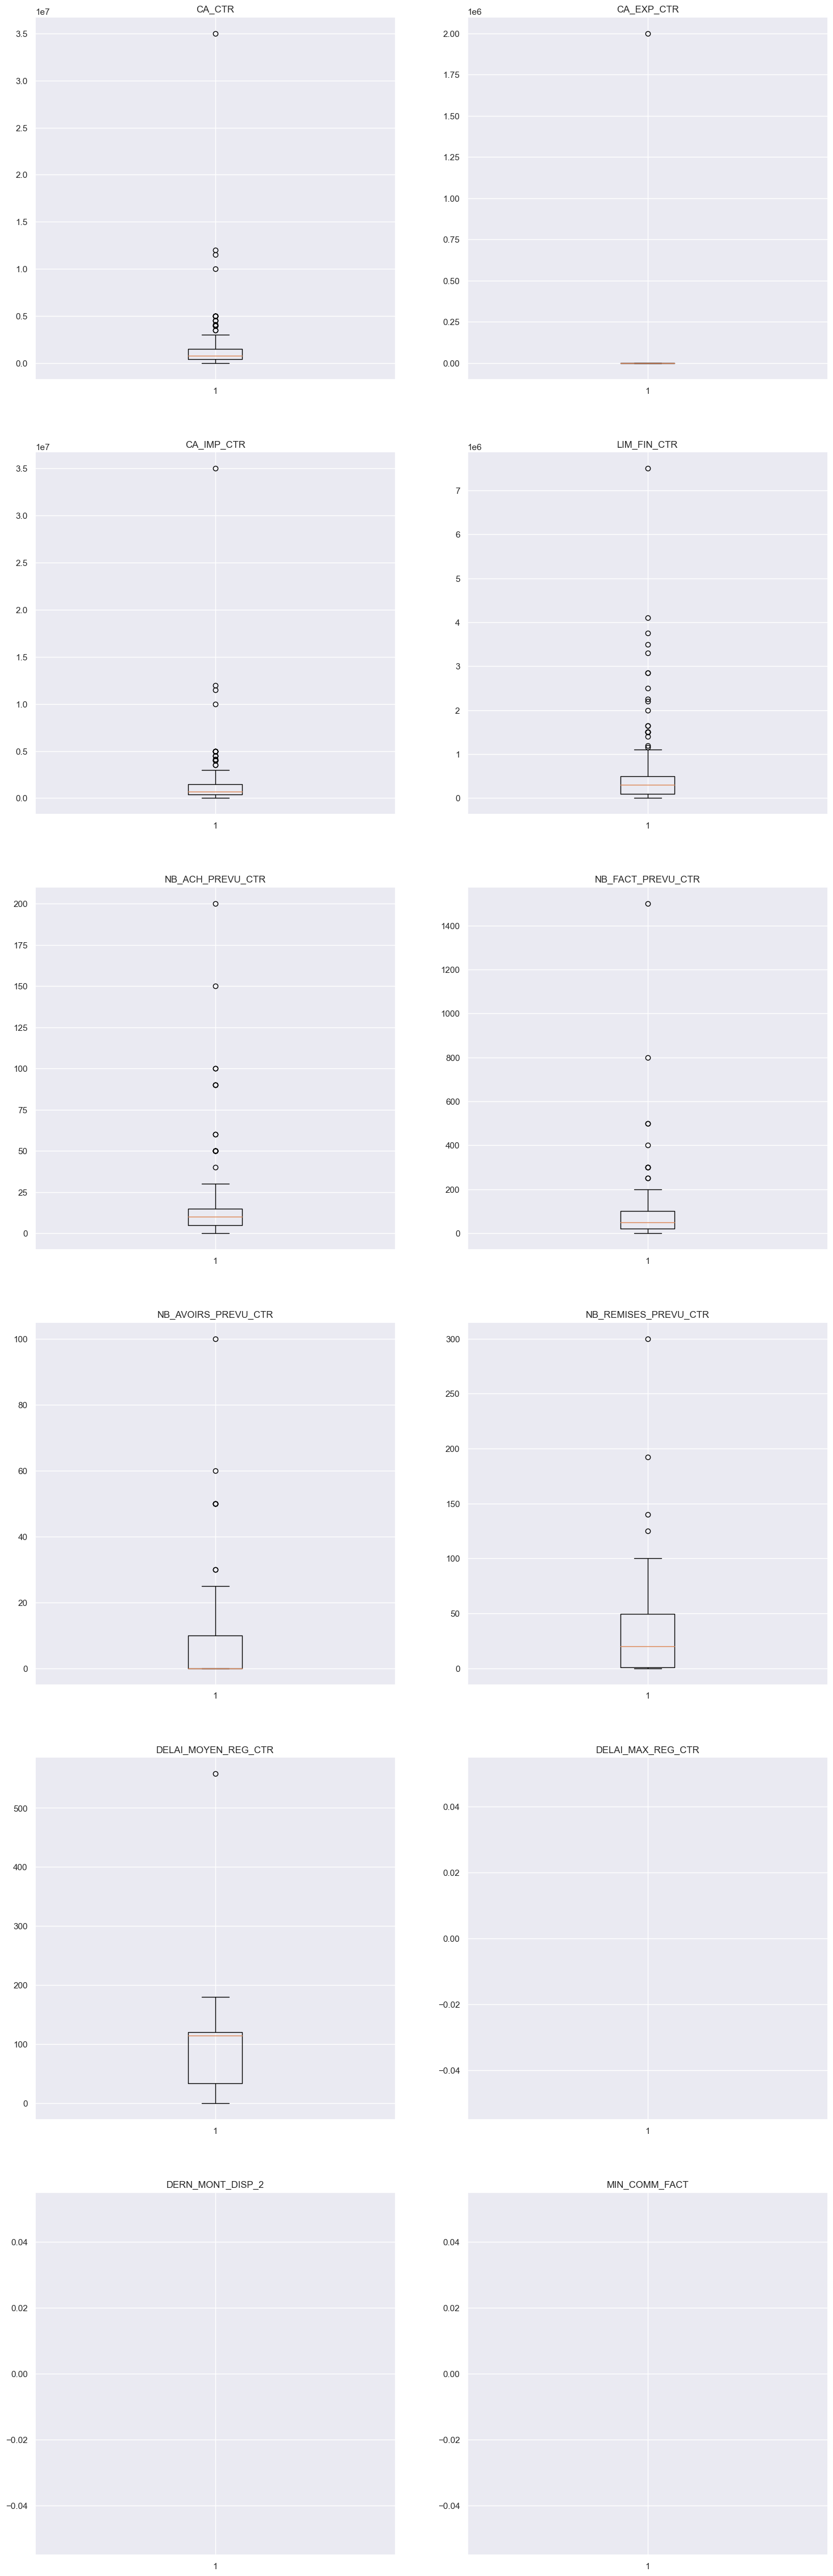

In [28]:
# Defining a function called "plot_boxplot" to plotting the outliers
#Boxplot is the suitable type of visualization for this purpose

def plot_boxplot(df, features):
    fig, ax = plt.subplots((len(features)//2), 2, figsize=(18, 58))
    y_axis = 0
    x_axis = 0
    for x, ft in enumerate(features):
        ax[y_axis, x_axis].boxplot(x = ft, data = df)
        ax[y_axis, x_axis].set_title(ft)
        if x_axis == 1:
            y_axis += 1
        if x % 2 == 0:
            x_axis = 1
        else:
            x_axis = 0
plot_boxplot(df=ctr_data, features=numerical_columns)


In [29]:
# Defining a function to get the output indices
def outliers(data, ft):
    # Calculate the IQR (Interquartile Range) for the column
    q1 = data[ft].quantile(0.25)
    q3 = data[ft].quantile(0.75)
    iqr = q3 - q1

    # Define the outlier thresholds
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    # Return the indices of each outlier
    return data.index[(data[ft] < lower_threshold) | (data[ft] > upper_threshold)]

# Print the number of outliers
for col in numerical_columns:
    num_outliers = len(outliers(ctr_data, col))
    print(f'Number of outliers in {col} :', num_outliers)


Number of outliers in CA_CTR : 18
Number of outliers in CA_EXP_CTR : 1
Number of outliers in CA_IMP_CTR : 18
Number of outliers in LIM_FIN_CTR : 20
Number of outliers in NB_ACH_PREVU_CTR : 16
Number of outliers in NB_FACT_PREVU_CTR : 10
Number of outliers in NB_AVOIRS_PREVU_CTR : 8
Number of outliers in NB_REMISES_PREVU_CTR : 4
Number of outliers in DELAI_MOYEN_REG_CTR : 1
Number of outliers in DELAI_MAX_REG_CTR : 26
Number of outliers in DERN_MONT_DISP_2 : 1
Number of outliers in MIN_COMM_FACT : 4


Practically, all the attributes contain outliers and this may looks bad. For example, there are 18 data points in the "Chiffre d'affaires" attribute (CA_CTR) that are considered outliers. These outliers might represent unusually high or low values compared to the majority of the data points in the distribution.

In [30]:
# Group the data by contract ID and calculate the total CA_CTR per contract
total_ca_per_contract = ctr_data.groupby('REF_CTR')['CA_CTR'].sum()
total_sales = ctr_data['CA_CTR'].sum()
print(f'Total Sales {total_sales}\n-----------------------------\n')

# Print the total CA_CTR per contract in a custom message
for contract_id, total_ca in total_ca_per_contract.items():
    print(f"Contract ID: {contract_id}, Total CA_CTR: {total_ca}")


Total Sales 219065782.412
-----------------------------

Contract ID: 8, Total CA_CTR: 0.0
Contract ID: 9, Total CA_CTR: 4000000.0
Contract ID: 10, Total CA_CTR: 5000000.0
Contract ID: 11, Total CA_CTR: 1500000.0
Contract ID: 18, Total CA_CTR: 256648.412
Contract ID: 19, Total CA_CTR: 1000000.0
Contract ID: 20, Total CA_CTR: 200000.0
Contract ID: 21, Total CA_CTR: 35000000.0
Contract ID: 22, Total CA_CTR: 4100000.0
Contract ID: 23, Total CA_CTR: 22000.0
Contract ID: 24, Total CA_CTR: 0.0
Contract ID: 25, Total CA_CTR: 5000000.0
Contract ID: 26, Total CA_CTR: 4000000.0
Contract ID: 27, Total CA_CTR: 1500000.0
Contract ID: 28, Total CA_CTR: 3500000.0
Contract ID: 29, Total CA_CTR: 1000000.0
Contract ID: 30, Total CA_CTR: 100000.0
Contract ID: 31, Total CA_CTR: 200000.0
Contract ID: 32, Total CA_CTR: 2500000.0
Contract ID: 33, Total CA_CTR: 150000.0
Contract ID: 34, Total CA_CTR: 150000.0
Contract ID: 35, Total CA_CTR: 1200000.0
Contract ID: 36, Total CA_CTR: 200000.0
Contract ID: 37, Tot

In [31]:
# Group the data by contract ID and calculate the total CA_IMP_CTR per contract
total_ca_per_contract = ctr_data.groupby('REF_CTR')['CA_IMP_CTR'].sum()
total_imp_sales = ctr_data['CA_IMP_CTR'].sum()
print(f'Total Imported Sales: {total_imp_sales}\n-----------------------------\n')

# Print the total CA_IMP_CTR per contract in a custom message
for contract_id, total_ca in total_ca_per_contract.items():
    print(f"Contract ID: {contract_id}, Total CA_IMP_CTR: {total_ca}")


Total Imported Sales: 217065782.412
-----------------------------

Contract ID: 8, Total CA_IMP_CTR: 0.0
Contract ID: 9, Total CA_IMP_CTR: 4000000.0
Contract ID: 10, Total CA_IMP_CTR: 5000000.0
Contract ID: 11, Total CA_IMP_CTR: 1500000.0
Contract ID: 18, Total CA_IMP_CTR: 256648.412
Contract ID: 19, Total CA_IMP_CTR: 1000000.0
Contract ID: 20, Total CA_IMP_CTR: 200000.0
Contract ID: 21, Total CA_IMP_CTR: 35000000.0
Contract ID: 22, Total CA_IMP_CTR: 4100000.0
Contract ID: 23, Total CA_IMP_CTR: 22000.0
Contract ID: 24, Total CA_IMP_CTR: 0.0
Contract ID: 25, Total CA_IMP_CTR: 5000000.0
Contract ID: 26, Total CA_IMP_CTR: 4000000.0
Contract ID: 27, Total CA_IMP_CTR: 1500000.0
Contract ID: 28, Total CA_IMP_CTR: 3500000.0
Contract ID: 29, Total CA_IMP_CTR: 1000000.0
Contract ID: 30, Total CA_IMP_CTR: 100000.0
Contract ID: 31, Total CA_IMP_CTR: 200000.0
Contract ID: 32, Total CA_IMP_CTR: 2500000.0
Contract ID: 33, Total CA_IMP_CTR: 150000.0
Contract ID: 34, Total CA_IMP_CTR: 150000.0
Contrac

In [32]:
# Group the data by contract ID and calculate the total CA_EXP_CTR per contract
total_ca_per_contract = ctr_data.groupby('REF_CTR')['CA_EXP_CTR'].sum()
total_exp_sales = ctr_data['CA_EXP_CTR'].sum()
print(f'Total Exported Sales: {total_exp_sales}\n-----------------------------\n')

# Print the total CA_EXP_CTR per contract in a custom message
for contract_id, total_ca in total_ca_per_contract.items():
    print(f"Contract ID: {contract_id}, Total CA_EXP_CTR: {total_ca}")


Total Exported Sales: 2000000.0
-----------------------------

Contract ID: 8, Total CA_EXP_CTR: 0.0
Contract ID: 9, Total CA_EXP_CTR: 0.0
Contract ID: 10, Total CA_EXP_CTR: 0.0
Contract ID: 11, Total CA_EXP_CTR: 0.0
Contract ID: 18, Total CA_EXP_CTR: 0.0
Contract ID: 19, Total CA_EXP_CTR: 0.0
Contract ID: 20, Total CA_EXP_CTR: 0.0
Contract ID: 21, Total CA_EXP_CTR: 0.0
Contract ID: 22, Total CA_EXP_CTR: 0.0
Contract ID: 23, Total CA_EXP_CTR: 0.0
Contract ID: 24, Total CA_EXP_CTR: 0.0
Contract ID: 25, Total CA_EXP_CTR: 0.0
Contract ID: 26, Total CA_EXP_CTR: 0.0
Contract ID: 27, Total CA_EXP_CTR: 0.0
Contract ID: 28, Total CA_EXP_CTR: 0.0
Contract ID: 29, Total CA_EXP_CTR: 0.0
Contract ID: 30, Total CA_EXP_CTR: 0.0
Contract ID: 31, Total CA_EXP_CTR: 0.0
Contract ID: 32, Total CA_EXP_CTR: 0.0
Contract ID: 33, Total CA_EXP_CTR: 0.0
Contract ID: 34, Total CA_EXP_CTR: 0.0
Contract ID: 35, Total CA_EXP_CTR: 0.0
Contract ID: 36, Total CA_EXP_CTR: 0.0
Contract ID: 37, Total CA_EXP_CTR: 0.0
Con

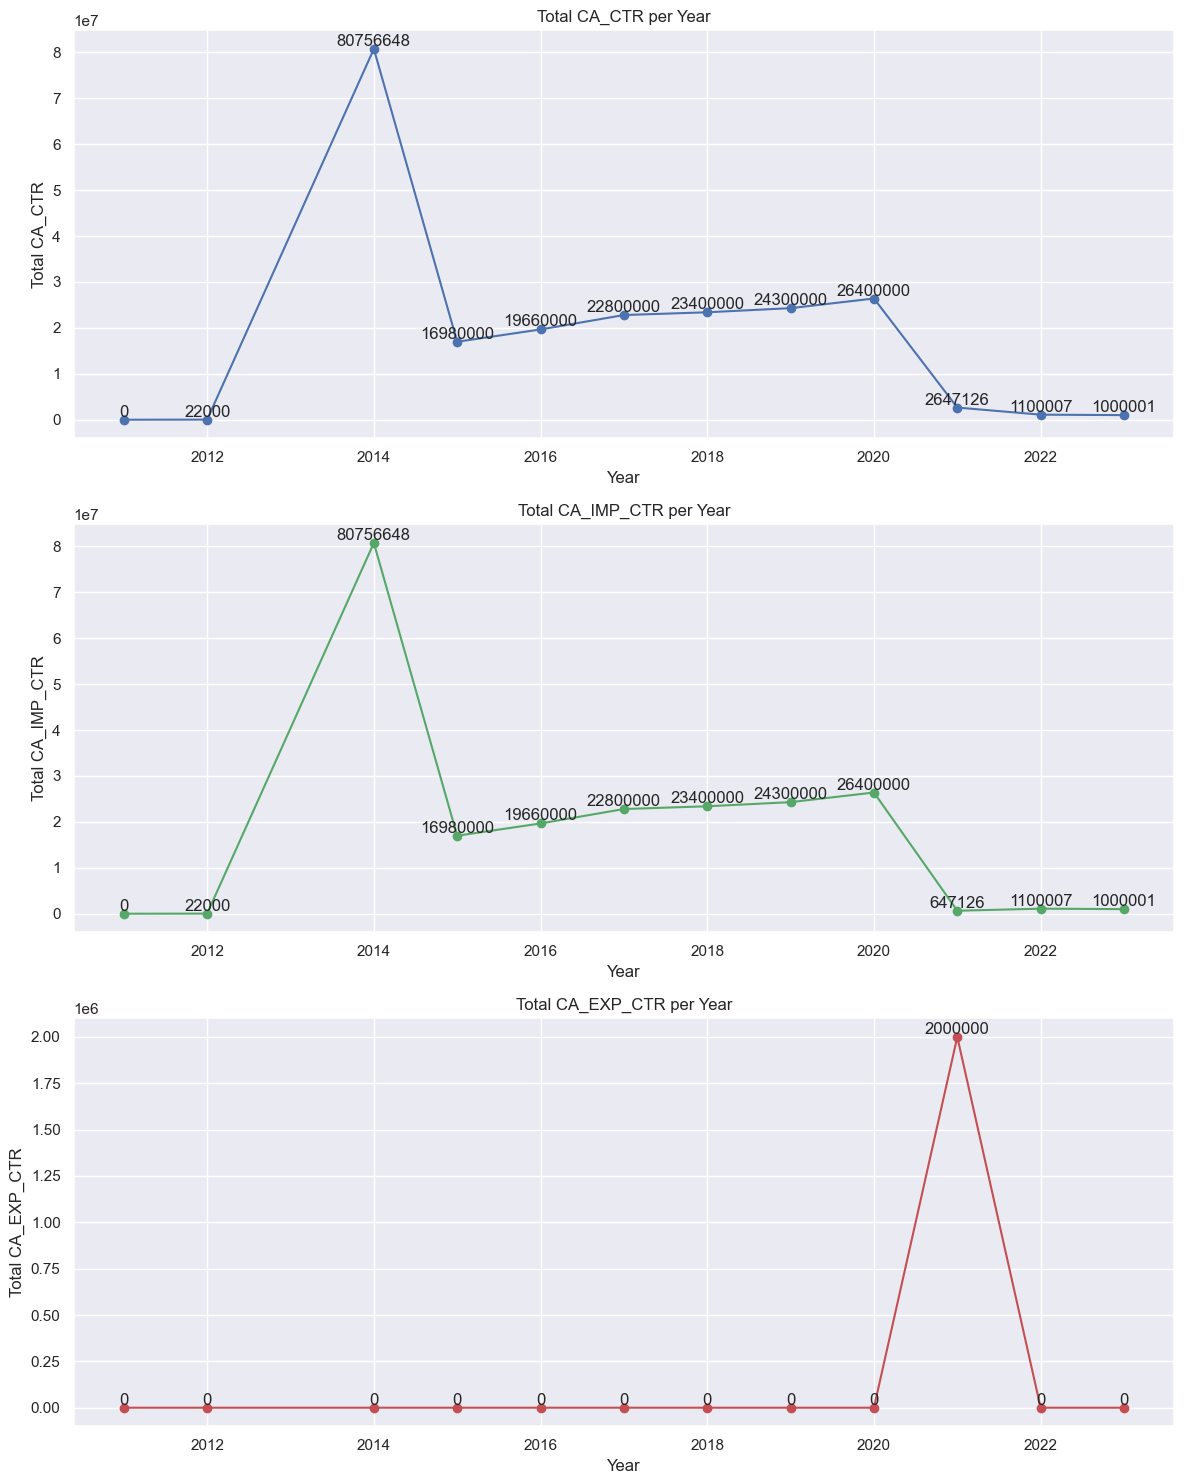

In [33]:
# Grouping data by year and calculating the sum of CA_CTR, CA_IMP_CTR, and CA_EXP_CTR
grouped_data = ctr_data.groupby(ctr_data['DAT_SIGN_CTR'].dt.year)[['CA_CTR', 'CA_IMP_CTR', 'CA_EXP_CTR']].sum()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot for CA_CTR
axs[0].plot(grouped_data.index, grouped_data['CA_CTR'], marker='o', linestyle='-', color='b')
for x, y in zip(grouped_data.index, grouped_data['CA_CTR']):
    axs[0].text(x, y, f"{y:.0f}", ha='center', va='bottom')

axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total CA_CTR')
axs[0].set_title('Total CA_CTR per Year')

# Plot for CA_IMP_CTR
axs[1].plot(grouped_data.index, grouped_data['CA_IMP_CTR'], marker='o', linestyle='-', color='g')
for x, y in zip(grouped_data.index, grouped_data['CA_IMP_CTR']):
    axs[1].text(x, y, f"{y:.0f}", ha='center', va='bottom')

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total CA_IMP_CTR')
axs[1].set_title('Total CA_IMP_CTR per Year')

# Plot for CA_EXP_CTR
axs[2].plot(grouped_data.index, grouped_data['CA_EXP_CTR'], marker='o', linestyle='-', color='r')
for x, y in zip(grouped_data.index, grouped_data['CA_EXP_CTR']):
    axs[2].text(x, y, f"{y:.0f}", ha='center', va='bottom')

axs[2].set_xlabel('Year')
axs[2].set_ylabel('Total CA_EXP_CTR')
axs[2].set_title('Total CA_EXP_CTR per Year')

# Adjust the layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

From the visualizations, we can observe that:
- CA_CTR and CA_IMP_CTR share the same value so we can consider them as a single field.
- 2014 had seen a huge peak of gain in terms of sales amount.
- Total CA_EXP_CTR displays fluctuations over the years, indicating variability in exported contract amounts. It's obvious that all of the signed contracts don't focus mostly on the exported sales.

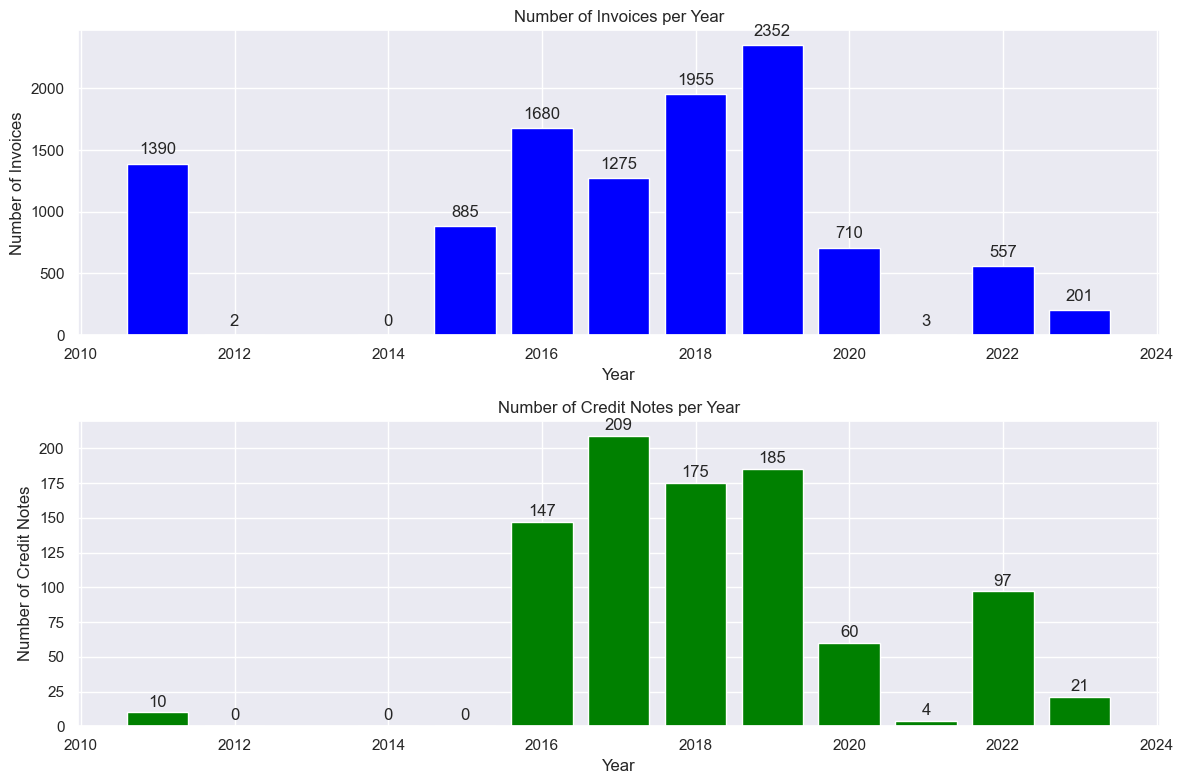

In [34]:
# Extracting the required data from the DataFrame
nb_fact_data = ctr_data["NB_FACT_PREVU_CTR"]
nb_avoir_data = ctr_data["NB_AVOIRS_PREVU_CTR"]
years = ctr_data["DAT_SIGN_CTR"].dt.year.unique()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting Number of Invoices (NB_FACT_PREVU_CTR) per year
ax1.bar(years, nb_fact_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum(), color='blue')
ax1.set_ylabel("Number of Invoices")
ax1.set_xlabel("Year")
ax1.set_title("Number of Invoices per Year")

# Adding values above each bar
for x, y in zip(years, nb_fact_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum()):
    ax1.text(x, y + 50, str(y), ha='center', va='bottom')

# Plotting Number of Credit Notes (NB_AVOIRS_PREVU_CTR) per year
ax2.bar(years, nb_avoir_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum(), color='green')
ax2.set_ylabel("Number of Credit Notes")
ax2.set_xlabel("Year")
ax2.set_title("Number of Credit Notes per Year")

# Adding values above each bar
for x, y in zip(years, nb_avoir_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum()):
    ax2.text(x, y + 2, str(y), ha='center', va='bottom')

# Adjusting layout to avoid overlapping
plt.tight_layout()

# Displaying the subplots
plt.show()

In the first subplot, we observe that the number of invoices per contract generally increases over the years, with some fluctuations. This indicates that the volume of sales or transactions conducted by the company has been growing or fluctuating across different contracts during the observed period.

In the second subplot, the count of credit notes per contract appears to be relatively smaller compared to the number of invoices. However, it also exhibits a slight increasing trend over time, which suggests that there have been instances of customers receiving credit or refunds for various reasons.

##### **History Tables**

In [35]:
# Checking history dataset dimension (shape)
his_data.shape

(12812, 12)

The dataset holds **12** columns with **12812** observations

In [36]:
# Returning all the datatypes used in the dataset
his_data.dtypes

ID_HISTORIQUE                 int64
DATE_ACTION          datetime64[ns]
ACTION                       object
T_TABLE                      object
ID_ENREGISTREMENT            object
LOGIN_USER                   object
IP_PC                        object
NOM_PC                       object
REF_CTR_HIST                float64
REF_IND_HIST                float64
ABREV_ROLE_HIST              object
ID_HISTORIQUEE                int64
dtype: object

The dataset, as it's mentioning, revolves around 4 types: 7 objects, 2 int64, 2 float64 and 1 datetime64[ns] (**4** numerical attributes and **8** categorical attributes). Actually, most of the fields are categorical, we won't be dealing with most of them

In [37]:
# Getting more statistical details
his_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_HISTORIQUE,12812.0,0.078286,8.861199,0.0,0.00,0.0,0.00,1003.0
REF_CTR_HIST,12764.0,120.453228,279.835317,0.0,50.00,66.0,125.00,3135.0
REF_IND_HIST,12775.0,667.963601,743.432354,1.0,202.00,442.0,1097.00,4159.0
ID_HISTORIQUEE,12812.0,6908.615673,4170.056172,3.0,3205.75,6789.5,10488.25,18298.0


The table presents descriptive statistics for four fields: "ID_HISTORIQUE," "REF_CTR_HIST," "REF_IND_HIST," and "ID_HISTORIQUEE." 

Given the values and ranges of these fields, they are likely identifiers, such as primary and foreign keys, used to link records to other tables in the database. As they do not contain meaningful data for direct analysis or insights, they may not be directly useful in extracting insights or patterns from the data.

In [38]:
# Checking missing values
his_data.isna().sum()

ID_HISTORIQUE         0
DATE_ACTION           0
ACTION                0
T_TABLE               0
ID_ENREGISTREMENT     0
LOGIN_USER            2
IP_PC                 1
NOM_PC                1
REF_CTR_HIST         48
REF_IND_HIST         37
ABREV_ROLE_HIST      52
ID_HISTORIQUEE        0
dtype: int64

In the dataset, several fields have missing values including :
- LOGIN_USER            2
- IP_PC                 1
- NOM_PC                1
- REF_CTR_HIST         48
- REF_IND_HIST         37
- ABREV_ROLE_HIST      52

Among all of these fields, I think the most important one for our purpose is ABREV_ROLE_HIST

In [39]:
# Check the number of unique value from all of the object datatype
his_data[['ACTION', 'ABREV_ROLE_HIST']].nunique()

ACTION               23
ABREV_ROLE_HIST    8633
dtype: int64

In [40]:
# Check the unique values from all of the object datatype
his_data['ACTION'].unique()

array(['Ajout', 'Modification', 'Réconsiliation', 'Creation Encaissement',
       'Numérisation_des_documents', 'Creation bordereau',
       'Valider bordereau', 'Saisi limite', 'Edit Individu',
       'Annuler encaissement', 'AnuulerTache', 'Validation_des_documents',
       'Rejeter bordereau', 'Lettrage', 'Creation Groupe',
       'DELETE T_MVT_CREDIT', 'Connexion', 'Déconnexion',
       'Résolution Impaye ', 'Anulation de réconciliation',
       'Annulation Réconsiliation ', 'Creation Deblocage FDG',
       'Réconciliation'], dtype=object)

In [41]:
his_data['ABREV_ROLE_HIST'].unique()

array([nan, 'Réconsiliation 64', 'Réconsiliation 100', ...,
       'Valider bordereau 2', ' Déconnexion SBR0519',
       'Creation bordereau 3'], dtype=object)

[2871, 2401, 2018, 1764, 1266, 907, 529, 426, 351, 279]
['Ajout', 'Modification', 'Réconsiliation', 'Creation Encaissement', 'Numérisation_des_documents', 'Creation bordereau', 'Valider bordereau', 'Saisi limite', 'Edit Individu', 'Others']


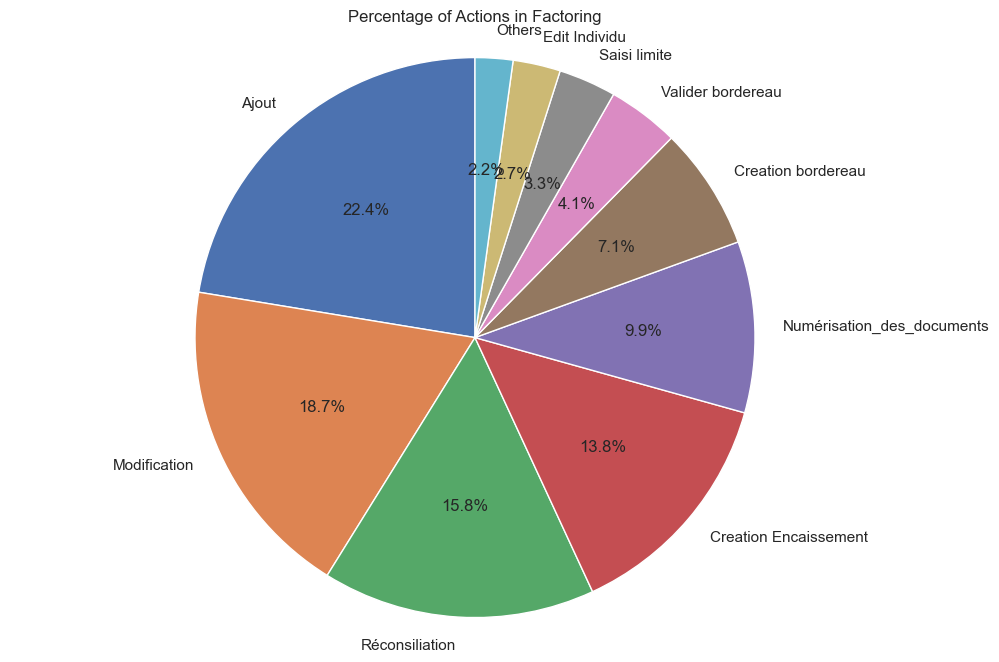

In [42]:
# Sample data for the "ACTION" field
actions = list(his_data['ACTION'].unique())[:9]
actions.append('Others')

# Sample counts for each action
action_counts = list(his_data['ACTION'].value_counts())
filtered_counts = action_counts[:9]
filtered_counts.append(sum(action_counts[9:]))
filtered_counts.sort(reverse=True)
print(filtered_counts)
print(actions)
# Create the pie chart with percentage values
plt.figure(figsize=(12, 8))
plt.pie(filtered_counts, labels=actions, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Percentage of Actions in Factoring')

# Display the pie chart
plt.show()

In [43]:
# Group the data by 'REF_HIST_CTR' and count the occurrences of each action
action_counts = his_data.groupby(['REF_CTR_HIST', 'ACTION']).size().reset_index(name='COUNT')

# Print the actions for each REF_HIST_CTR along with the total number of actions
for ref_ctr, action, count in zip(action_counts['REF_CTR_HIST'], action_counts['ACTION'], action_counts['COUNT']):
    print(f"REF_CTR_HIST {ref_ctr}: {action} - {count} times")

REF_CTR_HIST 0.0: Creation Encaissement - 3 times
REF_CTR_HIST 1.0: Creation Groupe - 1 times
REF_CTR_HIST 9.0: Annuler encaissement - 3 times
REF_CTR_HIST 9.0: AnuulerTache - 3 times
REF_CTR_HIST 9.0: Connexion - 15 times
REF_CTR_HIST 9.0: Creation Encaissement - 3 times
REF_CTR_HIST 9.0: Déconnexion - 10 times
REF_CTR_HIST 10.0: Connexion - 11 times
REF_CTR_HIST 10.0: Déconnexion - 10 times
REF_CTR_HIST 20.0: Connexion - 1 times
REF_CTR_HIST 20.0: Déconnexion - 1 times
REF_CTR_HIST 22.0: Creation bordereau - 2 times
REF_CTR_HIST 22.0: Valider bordereau - 2 times
REF_CTR_HIST 27.0: Creation Encaissement - 2 times
REF_CTR_HIST 27.0: Creation bordereau - 1 times
REF_CTR_HIST 27.0: Lettrage - 2 times
REF_CTR_HIST 27.0: Numérisation_des_documents - 6 times
REF_CTR_HIST 27.0: Réconsiliation - 2 times
REF_CTR_HIST 27.0: Saisi limite - 1 times
REF_CTR_HIST 27.0: Validation_des_documents - 3 times
REF_CTR_HIST 27.0: Valider bordereau - 1 times
REF_CTR_HIST 35.0: Annuler encaissement - 1 times

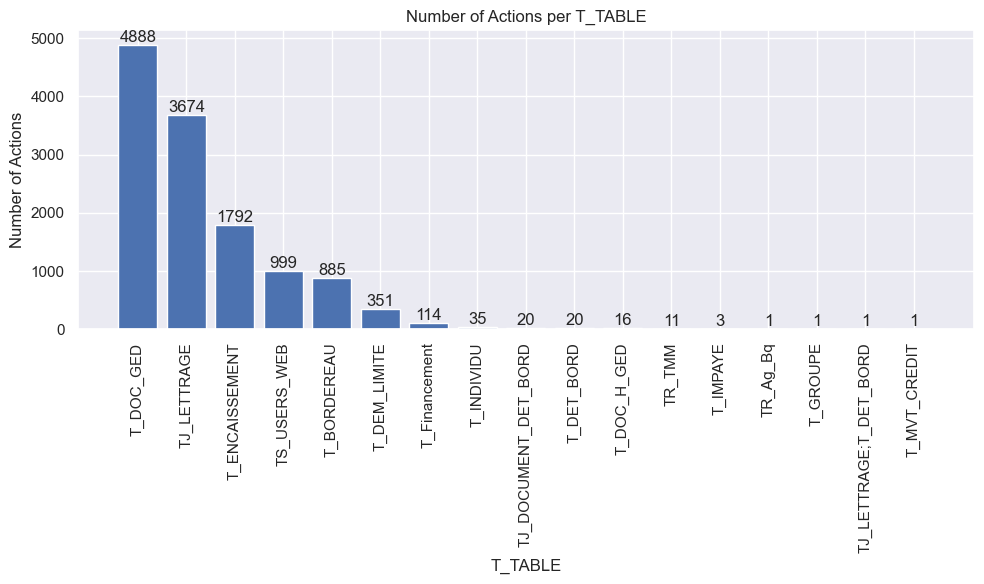

In [44]:
# Group the data by 'T_TABLE' and count the number of occurrences of each action
table_action_counts = his_data.groupby('T_TABLE')['ACTION'].size().reset_index(name='COUNT')

# Sort the data by the number of actions in descending order
table_action_counts = table_action_counts.sort_values(by='COUNT', ascending=False)

# Create a bar chart to display the number of actions per T_TABLE
plt.figure(figsize=(10, 6))
bars = plt.bar(table_action_counts['T_TABLE'], table_action_counts['COUNT'])
plt.xlabel('T_TABLE')
plt.ylabel('Number of Actions')
plt.title('Number of Actions per T_TABLE')
plt.xticks(rotation=90) 

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

This bar chart will provide a clear visual representation of the number of actions associated with each T_TABLE, allowing us to identify which tables have the highest and lowest number of actions.

##### **Encaissement Table**

In [45]:
# Checking encaissement dataset dimension (shape)
enc_data.shape

(13772, 15)

The dataset holds **15** columns with **13772** observations

In [46]:
# Returning all the datatypes used in the dataset
enc_data.dtypes

ID_ENC                    int64
REF_CTR_ENC               int64
REF_ADH_ENC             float64
REF_ACH_ENC             float64
MONT_ENC                float64
DEVISE_ENC               object
DAT_RECEP_ENC    datetime64[ns]
DAT_VAL_ENC              object
TYP_ENC                  object
VALIDE_ENC                 bool
REF_ENC                  object
RIB_ENC                  object
BORD_ENC                float64
REF_SEQ_ENC             float64
PREAVIS                 float64
dtype: object

The dataset, as it's mentioning, revolves around 5 types: 4 objects, 2 int64, 6 float64, 2 datetime64[ns] and 1 bool.

In [47]:
# Getting more statistical details
enc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_ENC,13772.0,7.026659e+03,4.029336e+03,10.0,3.561750e+03,7012.5,1.046325e+04,1.433600e+04
REF_CTR_ENC,13772.0,6.570193e+01,1.207361e+02,0.0,4.200000e+01,57.0,6.400000e+01,3.135000e+03
REF_ADH_ENC,13769.0,3.199208e+02,3.231739e+02,1.0,9.000000e+00,309.0,4.420000e+02,4.158000e+03
REF_ACH_ENC,13767.0,3.799324e+02,4.623637e+02,1.0,3.200000e+01,236.0,5.940000e+02,4.159000e+03
MONT_ENC,13771.0,5.271632e+05,5.922179e+07,0.0,1.524390e+03,4840.0,2.850091e+04,6.949654e+09
BORD_ENC,25.0,3.760000e+00,2.454248e+00,0.0,1.000000e+00,4.0,6.000000e+00,8.000000e+00
REF_SEQ_ENC,11849.0,1.917065e+08,1.235266e+07,2000001.0,1.799507e+08,189950879.0,1.999028e+08,2.377000e+08
PREAVIS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MONT_ENC: The MONT_ENC field indicates the monetary amount of each encaissement. The average value is approximately 527,163.20, with a wide standard deviation of around 59,221,789. The amounts range from 0 to 6,949,654, reflecting significant variability.

Given the values and ranges of these fields, they are likely identifiers, such as primary and foreign keys, used to link records to other tables in the database.

In [48]:
# Checking missing values
enc_data.isna().sum()

ID_ENC               0
REF_CTR_ENC          0
REF_ADH_ENC          3
REF_ACH_ENC          5
MONT_ENC             1
DEVISE_ENC          45
DAT_RECEP_ENC       87
DAT_VAL_ENC         89
TYP_ENC              0
VALIDE_ENC           0
REF_ENC              4
RIB_ENC            917
BORD_ENC         13747
REF_SEQ_ENC       1923
PREAVIS          13772
dtype: int64

With the given values, it's clear that there are no much missing values within the dataset, except :
- RIB_ENC            917 (This column is to be dropped completely or just removing the undesired rows)
- BORD_ENC         13747 (This column is oriented to be dropped off)
- REF_SEQ_ENC       1923 (This column is to be dropped completely or just removing the undesired rows)
- PREAVIS          13772 (This column is oriented to be dropped off)

In [49]:
# Checking the number of unique values of each categorical column
cat_vars = enc_data.select_dtypes(include='object')
# Removing DAT_VAL_ENC as it's considered as a date type not object
# Removing REF_ENC and RIB_ENC as well as they are unique identifiers and they won't help so far
cat_vars = cat_vars.drop(['DAT_VAL_ENC', 'REF_ENC', 'RIB_ENC'], axis=1)
cat_vars.nunique()

DEVISE_ENC    1
TYP_ENC       8
dtype: int64

In [50]:
# Printing the unique values associated to each category
for col in cat_vars.columns:
    print(f'- {col}: {enc_data[col].unique()}')

- DEVISE_ENC: [nan 'TND']
- TYP_ENC: ['T' 'C' 'V    ' 'A    ' 'V' 'A' 'E' 'P']


Looks like TYP_ENC contains 6 unique types not 8. Because of the existing spaces after V and A, they have been considered as 2 other different values.

Actually, I am going to precede the events and remove the spaces as I need the right results later

In [51]:
# Stripping the blank spaces out of TYP_ENC
enc_data['TYP_ENC'] = enc_data['TYP_ENC'].str.strip()
enc_data['TYP_ENC'].unique()

array(['T', 'C', 'V', 'A', 'E', 'P'], dtype=object)

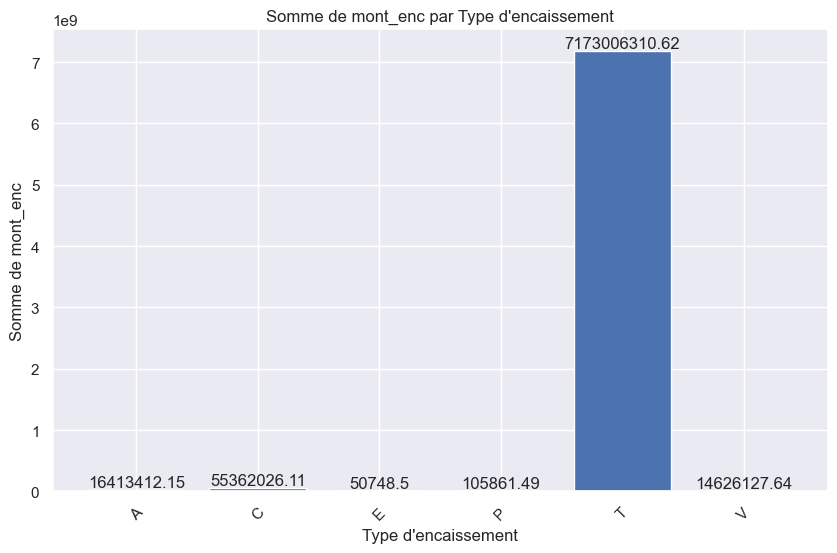

In [52]:
# Summing MONT_ENC for each TYP_ENC
sum_by_type = enc_data.groupby('TYP_ENC')['MONT_ENC'].sum()

plt.figure(figsize=(10, 6))
plt.bar(sum_by_type.index, sum_by_type.values)
plt.xlabel('Type d\'encaissement')
plt.ylabel('Somme de mont_enc')
plt.title('Somme de mont_enc par Type d\'encaissement')
plt.xticks(rotation=45)

# Adding text above each bar
for index, value in enumerate(sum_by_type.values):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

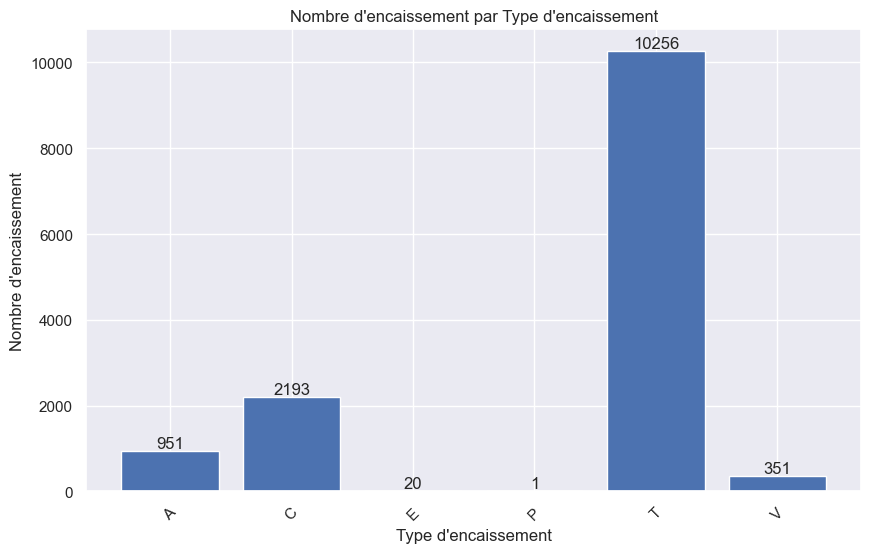

In [53]:
# Summing MONT_ENC for each TYP_ENC
count_by_type = enc_data.groupby('TYP_ENC')['ID_ENC'].count()

plt.figure(figsize=(10, 6))
plt.bar(count_by_type.index, count_by_type.values)
plt.xlabel('Type d\'encaissement')
plt.ylabel('Nombre d\'encaissement')
plt.title('Nombre d\'encaissement par Type d\'encaissement')
plt.xticks(rotation=45)

# Adding text above each bar
for index, value in enumerate(count_by_type.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

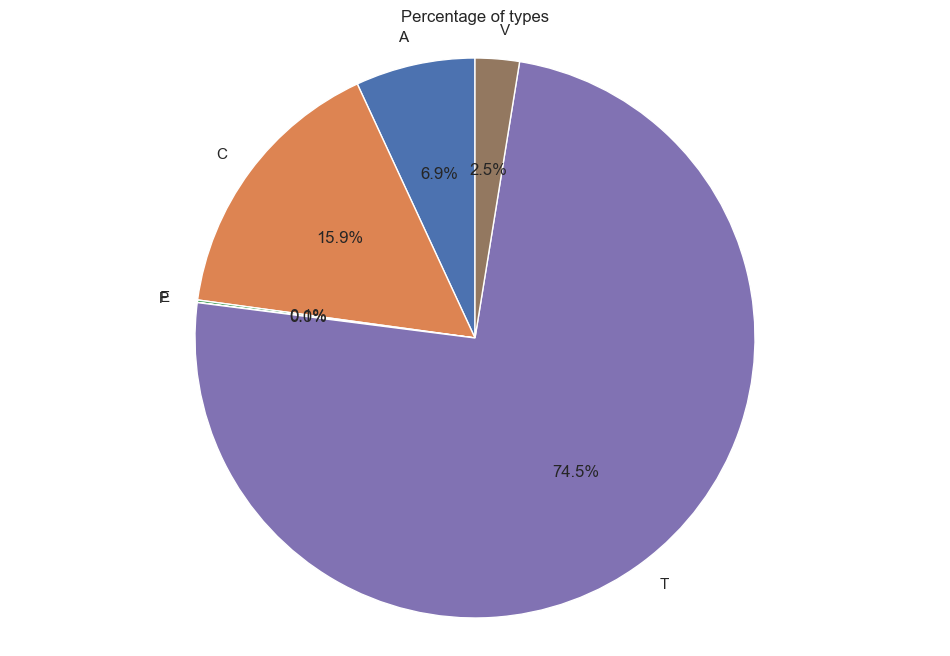

In [54]:
# Create the pie chart with percentage values
plt.figure(figsize=(12, 8))
plt.pie(count_by_type.values, labels=count_by_type.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Percentage of types')

# Display the pie chart
plt.show()

The T type is the most used one 

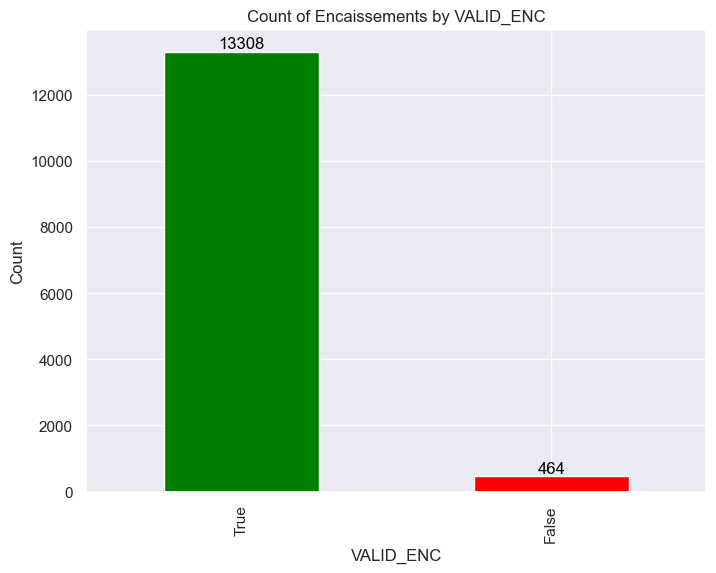

In [55]:
valid_enc_counts = enc_data['VALIDE_ENC'].value_counts()

# Count encaissements by valid_enc
plt.figure(figsize=(8, 6))
bar_plot = valid_enc_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('VALID_ENC')
plt.ylabel('Count')
plt.title('Count of Encaissements by VALID_ENC')
plt.xticks(range(len(valid_enc_counts)), valid_enc_counts.index)

# Add text above each bar
for idx, count in enumerate(valid_enc_counts):
    plt.text(idx, count, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

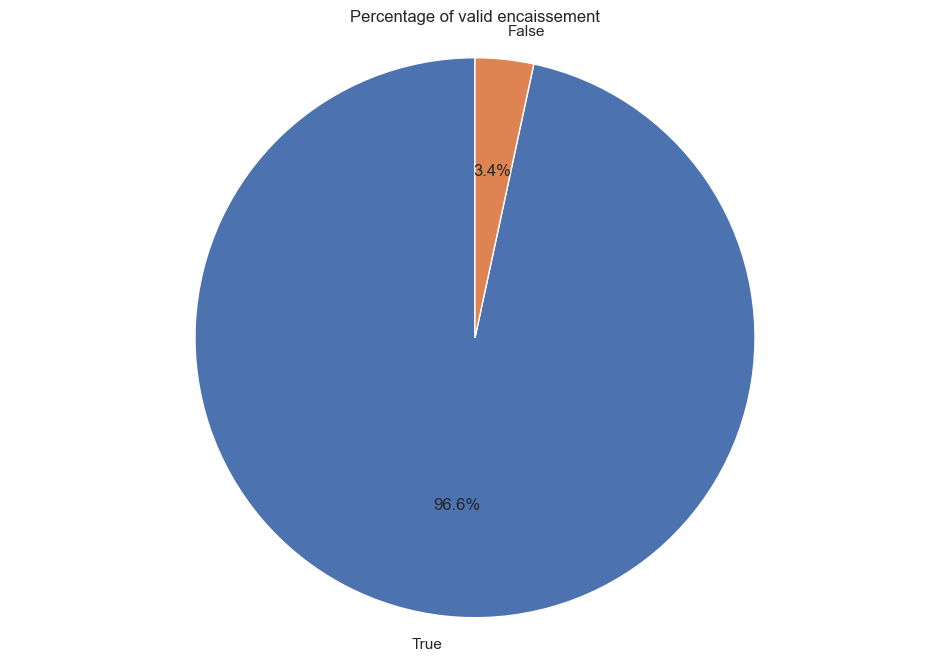

In [56]:
# Create the pie chart with percentage values
plt.figure(figsize=(12, 8))
plt.pie(valid_enc_counts.values, labels=valid_enc_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Percentage of valid encaissement')

# Display the pie chart
plt.show()

According to the pie chart, most of ENC are valid (96.6%)

<Figure size 1000x800 with 0 Axes>

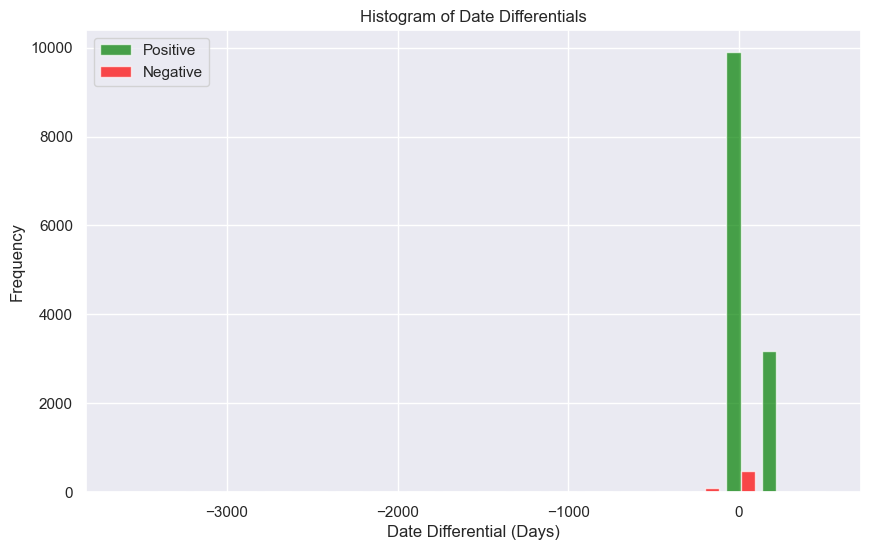

Number of negative differentials:
Date_Diff    578
dtype: int64


In [57]:
# Convertir la colonne 'DAT_VAL_ENC' en type datetime, les dates invalides seront remplacées par NaN
enc_data['DAT_VAL_ENC'] = pd.to_datetime(enc_data['DAT_VAL_ENC'], errors='coerce')

# Calculate the differential between DAT_RECEP and DAT_VAL
enc_data['Date_Diff'] = (enc_data['DAT_VAL_ENC'] - enc_data['DAT_RECEP_ENC']).dt.days

# Create the subplot
plt.figure(figsize=(10, 8))

# Separate positive and negative differentials
positive_diff = enc_data[enc_data['Date_Diff'] >= 0]['Date_Diff']
negative_diff = enc_data[enc_data['Date_Diff'] < 0]['Date_Diff']

# Create a histogram with green color for positive differentials and red color for negative differentials
plt.figure(figsize=(10, 6))
plt.hist([positive_diff, negative_diff], bins=20, color=['green', 'red'], alpha=0.7, label=['Positive', 'Negative'])

plt.xlabel('Date Differential (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Date Differentials')
plt.legend()

plt.show()

# Check for negative differentials
negative_diffs = (enc_data[['Date_Diff']] < 0).sum()

print("Number of negative differentials:")
print(negative_diffs)

In [58]:
negative_diff.sample(10)

6255   -35.0
8354   -19.0
4645   -28.0
8739    -1.0
6731    -7.0
1673    -1.0
5954    -1.0
6736    -1.0
6020    -8.0
7588   -62.0
Name: Date_Diff, dtype: float64

In [59]:
enc_data[enc_data['Date_Diff'] < 0][['DAT_RECEP_ENC', 'DAT_VAL_ENC', 'Date_Diff']].sample(10)

,DAT_RECEP_ENC,DAT_VAL_ENC,Date_Diff
8353,2019-01-07,2018-09-19,-110.0
3997,2017-05-19,2017-05-17,-2.0
6563,2018-07-18,2018-07-14,-4.0
4445,2017-07-03,2017-06-22,-11.0
953,2014-12-19,2014-12-16,-3.0
5768,2018-03-14,2018-03-09,-5.0
1033,2015-01-23,2014-12-31,-23.0
4860,2017-09-25,2017-09-22,-3.0
2732,2016-10-14,2016-02-12,-245.0
5747,2018-03-10,2018-03-09,-1.0


It's used to have a delay between the creation or recording of an encaissement and the actual availability or validation of the funds, which is why two separate fields may be used to capture these dates. The difference between DAT_RECEP_ENC and DAT_VAL_ENC may indicate the processing time or clearing time for the payment.

But, it appears that some records mark a negative differential, which may seem not logic

In [60]:
# Dropping the newly-created column 
enc_data = enc_data.drop(['Date_Diff'], axis=1)

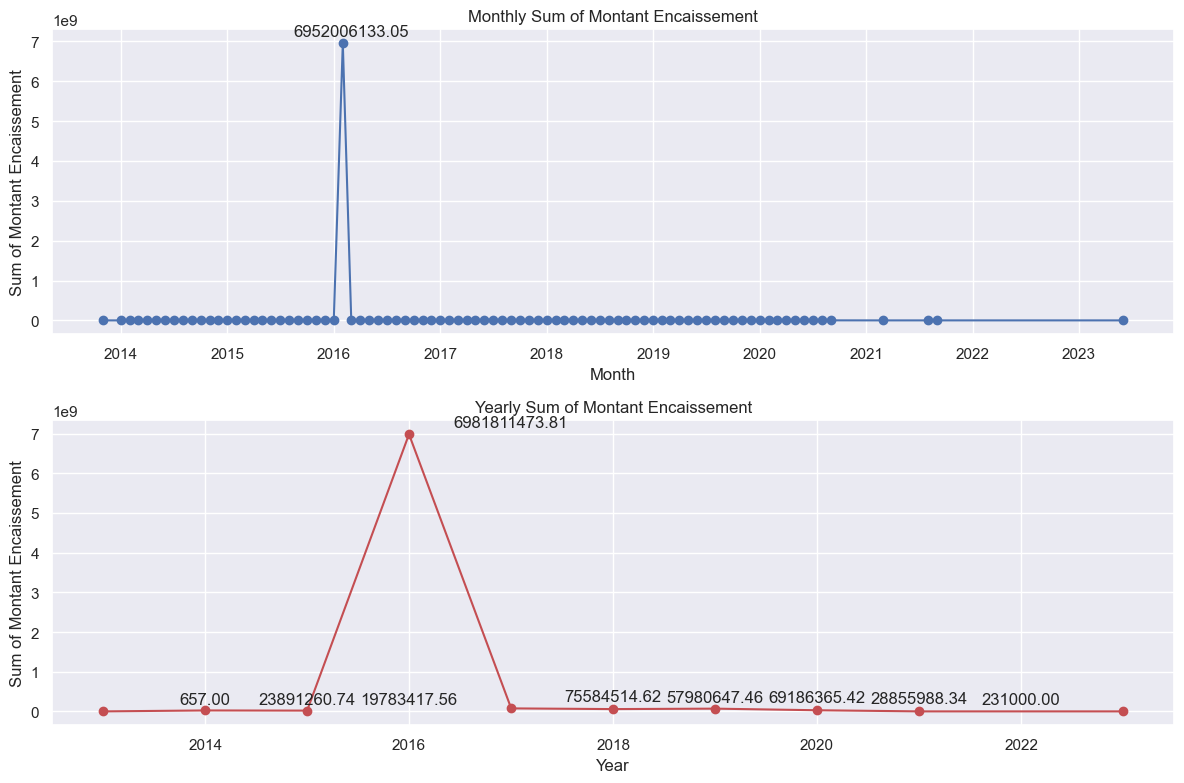

In [61]:
# Group data by month and calculate sum of mont_enc
monthly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.to_period('M'))['MONT_ENC'].sum()

# Group data by year and calculate sum of mont_enc
yearly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.to_period('Y'))['MONT_ENC'].sum()

# Create two subplots for monthly and yearly sums
plt.figure(figsize=(12, 8))

# Monthly sum subplot
plt.subplot(2, 1, 1)
plt.plot(monthly_sum.index.to_timestamp(), monthly_sum.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Monthly Sum of Montant Encaissement')

# Add text above each point in the monthly sum plot
for i, value in enumerate(monthly_sum.values):
    if i == 26:
        plt.annotate(f'{value:.2f}', (monthly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

# Yearly sum subplot
plt.subplot(2, 1, 2)
plt.plot(yearly_sum.index.to_timestamp(), yearly_sum.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Yearly Sum of Montant Encaissement')

# Add text above each point in the yearly sum plot
for i, value in enumerate(yearly_sum.values):
    plt.annotate(f'{value:.2f}', (yearly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.tight_layout()
plt.show()

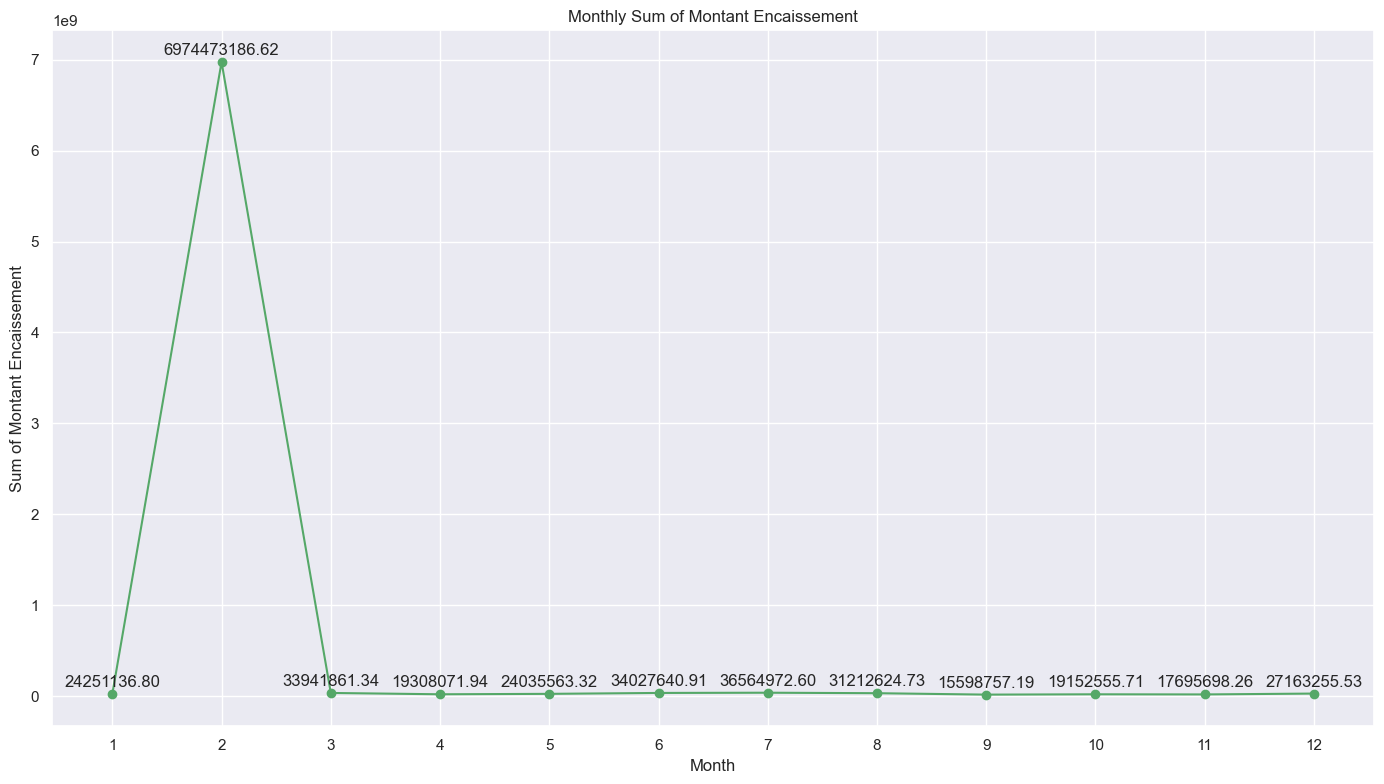

In [62]:
# Group data by month and calculate sum of mont_enc
monthly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.month)['MONT_ENC'].sum()

# Create a plot for the monthly sums
plt.figure(figsize=(14, 8))
plt.plot(monthly_sum.index, monthly_sum.values, marker='o', linestyle='-', color='g')
plt.xlabel('Month')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Monthly Sum of Montant Encaissement')

# Add text above each bar in the plot
for i, value in enumerate(monthly_sum.values):
    plt.annotate(f'{value:.2f}', (monthly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.xticks(range(1, 13))  # Set x-axis ticks to show all 12 months
plt.tight_layout()
plt.show()

It seems that February 2016 has seen a huge peak in terms of cash inflow

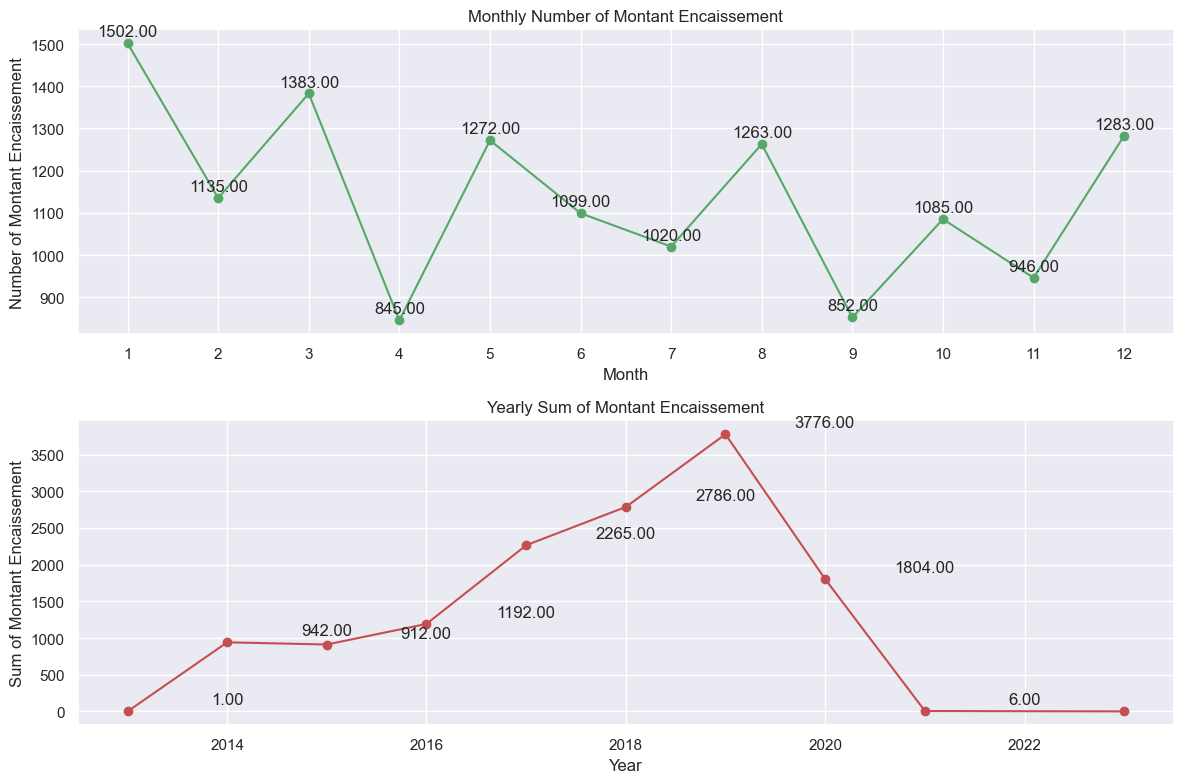

In [63]:
# Group data by month and calculate number of mont_enc
monthly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.month)['MONT_ENC'].count()

# Group data by year and calculate sum of mont_enc
yearly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.to_period('Y'))['MONT_ENC'].count()

# Create two subplots for monthly and yearly sums
plt.figure(figsize=(12, 8))

# Monthly sum subplot
plt.subplot(2, 1, 1)
plt.plot(monthly_sum.index, monthly_sum.values, marker='o', linestyle='-', color='g')
plt.xlabel('Month')
plt.ylabel('Number of Montant Encaissement')
plt.title('Monthly Number of Montant Encaissement')

# Add text above each bar in the plot
for i, value in enumerate(monthly_sum.values):
    plt.annotate(f'{value:.2f}', (monthly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.xticks(range(1, 13)) 

# Yearly sum subplot
plt.subplot(2, 1, 2)
plt.plot(yearly_sum.index.to_timestamp(), yearly_sum.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Yearly Sum of Montant Encaissement')

# Add text above each point in the yearly sum plot
for i, value in enumerate(yearly_sum.values):
    plt.annotate(f'{value:.2f}', (yearly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.tight_layout()
plt.show()

In [64]:
def sum_count_ref(ref):
    # Group the data by ref_ctr_enc, ref_adh, and ref_ach and calculate the sum and count
    grouped_data = enc_data.groupby([ref])['MONT_ENC'].agg(['sum', 'count']).reset_index()

    # Loop through the groups and print the custom message
    for index, row in grouped_data.iterrows():
        ref_sc = row[ref]
        total_sum = row['sum']
        total_count = row['count']
        
        message = f"For {ref} #{ref_sc}: \n"
        message += f"- Total sum of mont_enc\t\t{total_sum}\n- Total count of mont_enc\t{total_count}"
        print(message)

In [65]:
sum_count_ref('REF_CTR_ENC')

For REF_CTR_ENC #0.0: 
- Total sum of mont_enc		60387.633
- Total count of mont_enc	3.0
For REF_CTR_ENC #9.0: 
- Total sum of mont_enc		3586862.322
- Total count of mont_enc	71.0
For REF_CTR_ENC #10.0: 
- Total sum of mont_enc		1974297.7
- Total count of mont_enc	42.0
For REF_CTR_ENC #11.0: 
- Total sum of mont_enc		142755.16999999998
- Total count of mont_enc	10.0
For REF_CTR_ENC #19.0: 
- Total sum of mont_enc		314111.975
- Total count of mont_enc	1.0
For REF_CTR_ENC #20.0: 
- Total sum of mont_enc		80038.126
- Total count of mont_enc	5.0
For REF_CTR_ENC #21.0: 
- Total sum of mont_enc		1882307.384
- Total count of mont_enc	27.0
For REF_CTR_ENC #22.0: 
- Total sum of mont_enc		864576.101
- Total count of mont_enc	103.0
For REF_CTR_ENC #23.0: 
- Total sum of mont_enc		20045.342
- Total count of mont_enc	1.0
For REF_CTR_ENC #24.0: 
- Total sum of mont_enc		242242.448
- Total count of mont_enc	2.0
For REF_CTR_ENC #25.0: 
- Total sum of mont_enc		6416080.001
- Total count of mont_enc	164

In [66]:
sum_count_ref('REF_ADH_ENC')

For REF_ADH_ENC #1.0: 
- Total sum of mont_enc		4608574.459
- Total count of mont_enc	844.0
For REF_ADH_ENC #3.0: 
- Total sum of mont_enc		2066889.705
- Total count of mont_enc	31.0
For REF_ADH_ENC #4.0: 
- Total sum of mont_enc		89640.937
- Total count of mont_enc	6.0
For REF_ADH_ENC #5.0: 
- Total sum of mont_enc		256648.412
- Total count of mont_enc	3.0
For REF_ADH_ENC #6.0: 
- Total sum of mont_enc		20045.342
- Total count of mont_enc	1.0
For REF_ADH_ENC #7.0: 
- Total sum of mont_enc		3763264.09
- Total count of mont_enc	53.0
For REF_ADH_ENC #8.0: 
- Total sum of mont_enc		40073706.946
- Total count of mont_enc	1026.0
For REF_ADH_ENC #9.0: 
- Total sum of mont_enc		7014714841.396
- Total count of mont_enc	1496.0
For REF_ADH_ENC #18.0: 
- Total sum of mont_enc		10209820.3
- Total count of mont_enc	31.0
For REF_ADH_ENC #45.0: 
- Total sum of mont_enc		2241326.634
- Total count of mont_enc	2.0
For REF_ADH_ENC #81.0: 
- Total sum of mont_enc		5922058.988
- Total count of mont_enc	414

In [67]:
sum_count_ref('REF_ACH_ENC')

For REF_ACH_ENC #1.0: 
- Total sum of mont_enc		65599.998
- Total count of mont_enc	2.0
For REF_ACH_ENC #2.0: 
- Total sum of mont_enc		10000.0
- Total count of mont_enc	1.0
For REF_ACH_ENC #3.0: 
- Total sum of mont_enc		1799864.939
- Total count of mont_enc	4.0
For REF_ACH_ENC #7.0: 
- Total sum of mont_enc		607680.515
- Total count of mont_enc	15.0
For REF_ACH_ENC #8.0: 
- Total sum of mont_enc		1868368.053
- Total count of mont_enc	23.0
For REF_ACH_ENC #9.0: 
- Total sum of mont_enc		741548.236
- Total count of mont_enc	10.0
For REF_ACH_ENC #10.0: 
- Total sum of mont_enc		1788740.401
- Total count of mont_enc	221.0
For REF_ACH_ENC #11.0: 
- Total sum of mont_enc		611146.828
- Total count of mont_enc	53.0
For REF_ACH_ENC #12.0: 
- Total sum of mont_enc		662534.958
- Total count of mont_enc	283.0
For REF_ACH_ENC #13.0: 
- Total sum of mont_enc		1393746.562
- Total count of mont_enc	53.0
For REF_ACH_ENC #14.0: 
- Total sum of mont_enc		149635.204
- Total count of mont_enc	67.0
For RE

In [93]:
# Group the data by REF_ADH_ENC and REF_ACH_ENC and get the top 5 MONT_ENC per ref
top_ref_adh = enc_data.groupby('REF_ADH_ENC')['MONT_ENC'].apply(lambda x: x.nlargest(5).sum())
top_ref_ach = enc_data.groupby('REF_ACH_ENC')['MONT_ENC'].apply(lambda x: x.nlargest(5).sum())

# Reset the index to obtain the grouped data
top_ref_adh = top_ref_adh.reset_index()
top_ref_ach = top_ref_ach.reset_index()

# Sort top_ref_adh by the sum of 'MONT_ENC' values in descending order
top_ref_adh = top_ref_adh.sort_values(by='MONT_ENC', ascending=False)
top_ref_ach = top_ref_ach.sort_values(by='MONT_ENC', ascending=False)

# Filter the data to include only the top 5 refs
desired_refs_adh = top_ref_adh.head(5)['REF_ADH_ENC']
desired_refs_ach = top_ref_ach.head(5)['REF_ACH_ENC']

top_ref_adh = top_ref_adh[top_ref_adh['REF_ADH_ENC'].isin(desired_refs_adh)]
top_ref_ach = top_ref_ach[top_ref_ach['REF_ACH_ENC'].isin(desired_refs_ach)]

# Print the data
print("top_ref_adh:")
print(top_ref_adh)

print("top_ref_ach:")
print(top_ref_ach)


top_ref_adh:
    REF_ADH_ENC      MONT_ENC
7           9.0  6.952906e+09
33        309.0  1.636856e+07
47        491.0  1.193388e+07
25        204.0  9.096790e+06
60        591.0  6.507924e+06
top_ref_ach:
     REF_ACH_ENC      MONT_ENC
24          31.0  6.950269e+09
399        506.0  1.616776e+07
67          81.0  1.188312e+07
128        206.0  8.646984e+06
462        591.0  6.416122e+06


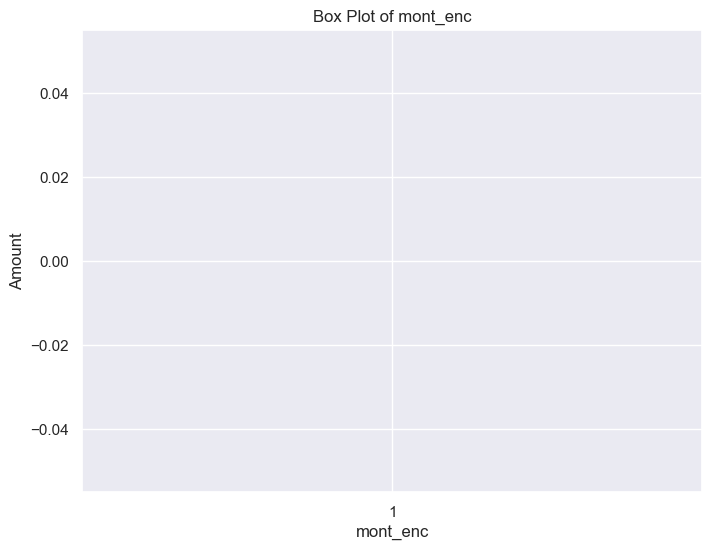

In [68]:
# Create a box plot to visualize the distribution of mont_enc
plt.figure(figsize=(8, 6))
plt.boxplot(enc_data['MONT_ENC'])
plt.xlabel('mont_enc')
plt.ylabel('Amount')
plt.title('Box Plot of mont_enc')
plt.show()

In [69]:
# Calculate z-scores for mont_enc
z_scores = stats.zscore(enc_data['MONT_ENC'])

# Set the threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Find the indices of potential outliers
outlier_indices = [index for index, z_score in enumerate(z_scores) if abs(z_score) > threshold]

# Get the values of mont_enc that are potential outliers
potential_outliers = enc_data['MONT_ENC'].iloc[outlier_indices]

# Print the potential outliers
print("Potential Outliers in mont_enc:")
print(potential_outliers)


Potential Outliers in mont_enc:
Series([], Name: MONT_ENC, dtype: float64)


In the box plot, the outliers are represented as individual points outside the "whiskers" of the box. These points are considered potential outliers, and any data points beyond the whiskers can be further investigated.

But as long as nothing is shown in the graph (box plot) and there are empty z-scores, it means that there are no potential outliers in the mont_enc column based on the chosen method (box plot and z-scores).